In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import seaborn as sns
import xarray as xr

import covid19

## data

In [3]:
istat_path = 'comuni_giornaliero.csv'
_, istat = covid19.data.read_istat(istat_path)

istat_italy = istat.sel(year=2020).sum(['location', 'age_class'])
istat_italy -= istat_italy.sel(time=slice(None, '2020-02-20')).mean()
istat_italy = istat_italy.sel(time=slice(None, '2020-03-31'))
istat_italy

<xarray.DataArray (time: 91)>
array([-6.43137255e+00, -1.43137255e+00,  1.45686275e+01,  5.68627451e-01,
       -2.04313725e+01,  5.75686275e+01,  1.45686275e+01, -1.84313725e+01,
        8.25686275e+01,  9.45686275e+01, -4.64313725e+01, -1.04313725e+01,
        5.55686275e+01,  6.55686275e+01,  1.05686275e+01,  1.85686275e+01,
        8.55686275e+01,  1.56862745e+00,  2.05686275e+01,  5.68627451e-01,
       -9.43137255e+00,  6.15686275e+01,  8.15686275e+01,  3.55686275e+01,
        8.35686275e+01, -4.74313725e+01,  7.95686275e+01,  8.05686275e+01,
        5.68627451e-01, -5.34313725e+01,  1.55686275e+01, -2.94313725e+01,
       -5.14313725e+01,  3.95686275e+01,  2.25686275e+01, -9.04313725e+01,
       -2.14313725e+01, -2.94313725e+01, -2.74313725e+01, -6.64313725e+01,
       -5.74313725e+01,  7.56862745e+00,  3.55686275e+01, -2.24313725e+01,
        4.35686275e+01, -8.64313725e+01, -1.64431373e+02, -8.84313725e+01,
       -4.24313725e+01, -5.43137255e+00, -1.13431373e+02, -9.14313725e+01,
       -1.40431373e+02, -1.13431373e+02,  5.05686275e+01,  2.15686275e+01,
       -2.64313725e+01, -8.14313725e+01, -2.04313725e+01, -9.74313725e+01,
       -3.44313725e+01,  5.75686275e+01,  8.85686275e+01, -4.34313725e+01,
        1.06568627e+02,  2.18568627e+02,  1.57568627e+02,  2.07568627e+02,
        3.96568627e+02,  4.74568627e+02,  4.48568627e+02,  5.84568627e+02,
        7.18568627e+02,  7.13568627e+02,  6.84568627e+02,  7.62568627e+02,
        8.72568627e+02,  1.04956863e+03,  1.08056863e+03,  1.13856863e+03,
        1.22656863e+03,  1.19256863e+03,  1.25556863e+03,  1.19256863e+03,
        1.21056863e+03,  1.19556863e+03,  1.23656863e+03,  1.18156863e+03,
        1.04456863e+03,  1.03156863e+03,  7.58568627e+02])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-03-31
    year     int64 2020

In [4]:
# data_italy_path = 'dpc-covid19-ita-andamento-nazionale.csv'
data_italy_regions_path = 'dpc-covid19-ita-regioni.csv'

In [5]:
# data_italy_path = covid19.data.download('andamento-nazionale')
data_italy_regions_path = covid19.data.download('regioni')

In [6]:
ds_italy_regions = covid19.data.read_dpc(data_italy_regions_path)

ds_italy_regions['mortality'] = ds_italy_regions['deaths'] / ds_italy_regions['population'] * 1000
ds_italy_regions['daily_deaths'] = ds_italy_regions['deaths'].diff('time')
ds_italy_regions['daily_confirmed'] = ds_italy_regions['confirmed'].diff('time')
ds_italy_regions['daily_tests'] = ds_italy_regions['tests'].diff('time')
ds_italy_regions['diff_current_confirmed'] = ds_italy_regions['current_confirmed'].diff('time')
ds_italy_regions['daily_tested'] = ds_italy_regions['tested'].diff('time')
ds_italy_regions = ds_italy_regions.fillna(0)
ds_italy_regions = ds_italy_regions.assign_coords({'location': ('location', [l.partition(' / ')[2] for l in ds_italy_regions.location.values])})
ds_italy_regions

<xarray.Dataset>
Dimensions:                 (location: 21, time: 88)
Coordinates:
  * time                    (time) datetime64[ns] 2020-02-24 ... 2020-05-21
  * location                (location) <U21 'Abruzzo' 'Basilicata' ... 'Veneto'
    lat                     (location) float64 42.35 40.64 38.91 ... 45.74 45.43
    lon                     (location) float64 13.4 15.81 16.59 ... 7.32 12.34
    country                 (location) <U5 'Italy' 'Italy' ... 'Italy' 'Italy'
    state_region            (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
Data variables:
    current_severe          (time, location) int64 0 0 0 0 10 ... 169 17 26 237
    current_critical        (time, location) int64 0 0 0 0 2 0 ... 11 41 2 1 15
    deaths                  (time, location) int64 0 0 0 0 ... 1004 74 143 1841
    current_confirmed       (time, location) int64 0 0 0 0 ... 1877 61 43 3286
    confirmed               (time, location) int64 0 0 0 0 ... 1429 1176 19038
    tests                   (time, location) int64 5 0 1 ... 60471 13261 548573
    tested                  (time, location) float64 0.0 0.0 ... 2.907e+05
    dimessi_guariti         (time, location) int64 0 0 0 0 ... 1294 990 13911
    population              (location) int64 1322247 570365 ... 126883 4907529
    mortality               (time, location) float64 0.0 0.0 ... 1.127 0.3751
    daily_deaths            (time, location) float64 0.0 0.0 0.0 ... 0.0 0.0 9.0
    daily_confirmed         (time, location) float64 0.0 0.0 0.0 ... 2.0 1.0 8.0
    daily_tests             (time, location) float64 0.0 0.0 ... 341.0 1.178e+04
    diff_current_confirmed  (time, location) float64 0.0 0.0 0.0 ... -3.0 -246.0
    daily_tested            (time, location) float64 0.0 0.0 ... 301.0 4.896e+03

In [7]:
tmp = ds_italy_regions.sortby(-ds_italy_regions['mortality'].isel(time=-1)).isel(time=-1)
REGIONS = list(tmp.location.astype(str).values)
tmp.to_dataframe()

current_severe  current_critical  deaths  \
location                                                          
Lombardia                        4119               226   15727   
Valle d'Aosta                      26                 1     143   
Emilia-Romagna                    592                92    4025   
Liguria                           283                22    1397   
Piemonte                         1479                83    3742   
P.A. Trento                        40                 6     455   
Marche                            111                16     990   
P.A. Bolzano                       50                 5     291   
Veneto                            237                15    1841   
Abruzzo                           175                 5     391   
Toscana                           169                41    1004   
Friuli Venezia Giulia              72                 2     323   
Puglia                            236                20     478   
Lazio                            1110                68     662   
Umbria                             17                 2      74   
Sardegna                           64                12     127   
Molise                              8                 2      22   
Campania                          312                 9     403   
Sicilia                           107                11     268   
Calabria                           47                 1      96   
Basilicata                         15                 1      27   

                       current_confirmed  confirmed   tests    tested  \
location                                                                
Lombardia                          26715      86091  622565  368046.0   
Valle d'Aosta                         43       1176   13261   10380.0   
Emilia-Romagna                      4926      27417  278917  174485.0   
Liguria                             2075       9344   87011   50812.0   
Piemonte                            8710      29990  271286  179877.0   
P.A. Trento                           66       4378   73849   42954.0   
Marche                              1832       6689   91885   58667.0   
P.A. Bolzano                         250       2587   57104   25999.0   
Veneto                              3286      19038  548573  290682.0   
Abruzzo                             1272       3212   62161   42768.0   
Toscana                             1877      10000  218615  157388.0   
Friuli Venezia Giulia                578       3215  111541   68882.0   
Puglia                              1839       4413   97589   67562.0   
Lazio                               3637       7558  222071  177749.0   
Umbria                                61       1429   60471   42720.0   
Sardegna                             318       1356   46795   40461.0   
Molise                               194        423   12253   11819.0   
Campania                            1373       4723  155842   73912.0   
Sicilia                             1522       3417  127348  112329.0   
Calabria                             326       1156   59724   57465.0   
Basilicata                            60        394   24537   23903.0   

                       dimessi_guariti  population  mortality  daily_deaths  \
location                                                                      
Lombardia                        43649    10018806   1.569748          65.0   
Valle d'Aosta                      990      126883   1.127023           0.0   
Emilia-Romagna                   18466     4448841   0.904730          17.0   
Liguria                           5872     1565307   0.892477          11.0   
Piemonte                         17538     4392526   0.851902          24.0   
P.A. Trento                       3857      538604   0.844776           0.0   
Marche                            3867     1538055   0.643670           3.0   
P.A. Bolzano                      2046      524256   0.555072           0.0   
Veneto     

In [8]:
ds_italy = ds_italy_regions.sum('location')
ds_italy['mortality'] = ds_italy['deaths'] / ds_italy['population'] * 1000
ds_italy.to_dataframe().tail(12)

current_severe  current_critical  deaths  current_confirmed  \
time                                                                      
2020-05-10           13618              1027   30560              83324   
2020-05-11           13539               999   30739              82488   
2020-05-12           12865               952   30911              81266   
2020-05-13           12172               893   31106              78457   
2020-05-14           11453               855   31368              76440   
2020-05-15           10792               808   31610              72070   
2020-05-16           10400               775   31763              70187   
2020-05-17           10311               762   31908              68351   
2020-05-18           10207               749   32007              66553   
2020-05-19            9991               716   32169              65129   
2020-05-20            9624               676   32330              62752   
2020-05-21            9269               640   32486              60960   

            confirmed    tests     tested  dimessi_guariti  population  \
time                                                                     
2020-05-10     219070  2565912  1676460.0           105186    60589085   
2020-05-11     219814  2606652  1702283.0           106587    60589085   
2020-05-12     221216  2673655  1741903.0           109039    60589085   
2020-05-13     222104  2735628  1778952.0           112541    60589085   
2020-05-14     223096  2807504  1820083.0           115288    60589085   
2020-05-15     223885  2875680  1859110.0           120205    60589085   
2020-05-16     224760  2944859  1899767.0           122810    60589085   
2020-05-17     225435  3004960  1933272.0           125176    60589085   
2020-05-18     225886  3041366  1959373.0           127326    60589085   
2020-05-19     226699  3104524  1999599.0           129401    60589085   
2020-05-20     227364  3171719  2038216.0           132282    60589085   
2020-05-21     228006  3243398  2078860.0           134560    60589085   

            mortality  daily_deaths  daily_confirmed  daily_tests  \
time                                                                
2020-05-10   0.504381         165.0            802.0      51678.0   
2020-05-11   0.507336         179.0            744.0      40740.0   
2020-05-12   0.510174         172.0           1402.0      67003.0   
2020-05-13   0.513393         195.0            888.0      61973.0   
2020-05-14   0.517717         262.0            992.0      71876.0   
2020-05-15   0.521711         242.0            789.0      68176.0   
2020-05-16   0.524236         153.0            875.0      69179.0   
2020-05-17   0.526630         145.0            675.0      60101.0   
2020-05-18   0.528263          99.0            451.0      36406.0   
2020-05-19   0.530937         162.0            813.0      63158.0   
2020-05-20   0.533594         161.0            665.0      67195.0   
2020-05-21   0.536169         156.0            642.0      71679.0   

            diff_current_confirmed  daily_tested  
time                                              
2020-05-10                 -1518.0       31384.0  
2020-05-11                  -836.0       25823.0  
2020-05-12                 -1222.0       39620.0  
2020-05-13                 -2809.0       37049.0  
2020-05-14                 -2017.0       41131.0  
2020-05-15                 -4370.0       39027.0  
2020-05-16                 -1883.0       40657.0  
2020-05-17                 -1836.0       33505.0  
2020-05-18                 -1798.0       26101.0  
2020-05-19                 -1424.0       40226.0  
2020-05-20                 -2377.0       38617.0  
2020-05-21                 -1792.0       40644.0

## situation report

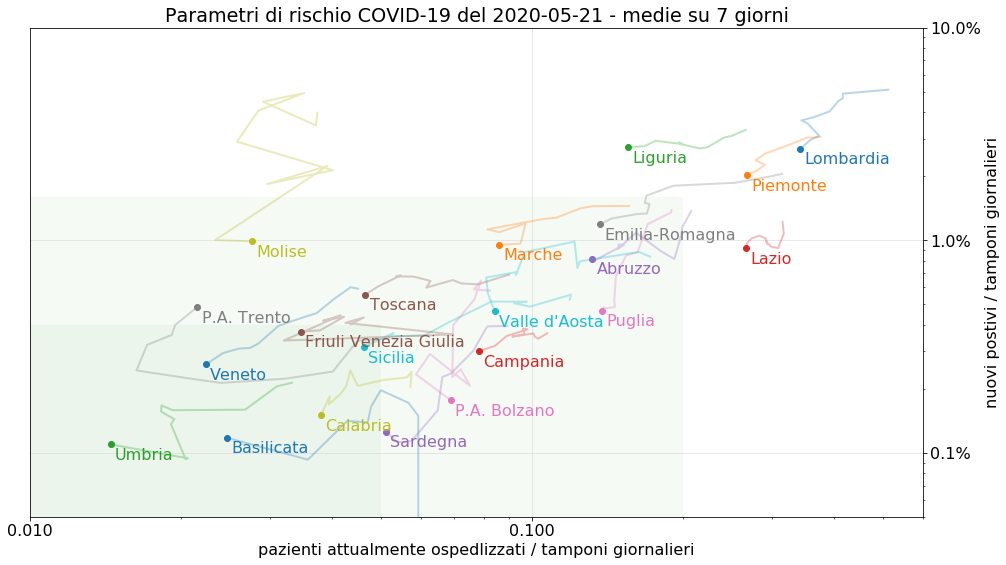

In [9]:
window = 7
rr = ds_italy_regions.isel(time=slice(-(window + 10), None)).rolling({'time': window}).mean().dropna('time')
it_rr = rr.sum('location')
rrr = ds_italy_regions
it_rrr = rrr.sum('location')
var = rr['daily_confirmed'] / np.maximum(rr['daily_tests'], 1)
it_var = it_rr['daily_confirmed'] / np.maximum(it_rr['daily_tests'], 1)
var1 = rrr['current_severe'] / np.maximum(rr['daily_tests'], 1)
it_var1 = it_rrr['current_severe'] / np.maximum(it_rr['daily_tests'], 1)
var2 = ((rrr['current_severe'] + rrr['current_critical']) / np.maximum(rrr['current_confirmed'], 1))

b = ['Veneto', 'Marche', 'Umbria', 'Campania', 'Abruzzo', 'Toscana', 'Puglia', 'Emilia-Romagna', 'Molise', 'Sicilia']
r =  b + ['Lombardia', 'Piemonte', 'Liguria', 'Lazio', 'Sardegna', 'Friuli Venezia Giulia', 'P.A. Bolzano', 'P.A. Trento', 'Calabria', "Valle d'Aosta", 'Basilicata']
_, ax = covid19.plot.subplots()
ax.fill([0, 0.2, 0.2, 0], [0, 0, 0.016, 0.016], 'green', alpha=0.04)
ax.fill([0, 0.05, 0.05, 0], [0, 0, 0.004, 0.04], 'green', alpha=0.04)
covid19.plot.scatter_xarray(var1.sel(location=r), var, ax=ax)
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1., decimals=0))
_ = ax.set(
    xscale='log',
    yscale='log',
    title=f'Parametri di rischio COVID-19 del {str(var1.time.max().values)[:10]} - medie su {window} giorni',
    xlim=(0.01, .6),
    ylim=(0.0005, 0.1),
    xlabel='pazienti attualmente ospedlizzati / tamponi giornalieri',
    ylabel='nuovi postivi / tamponi giornalieri',
)
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.))

21

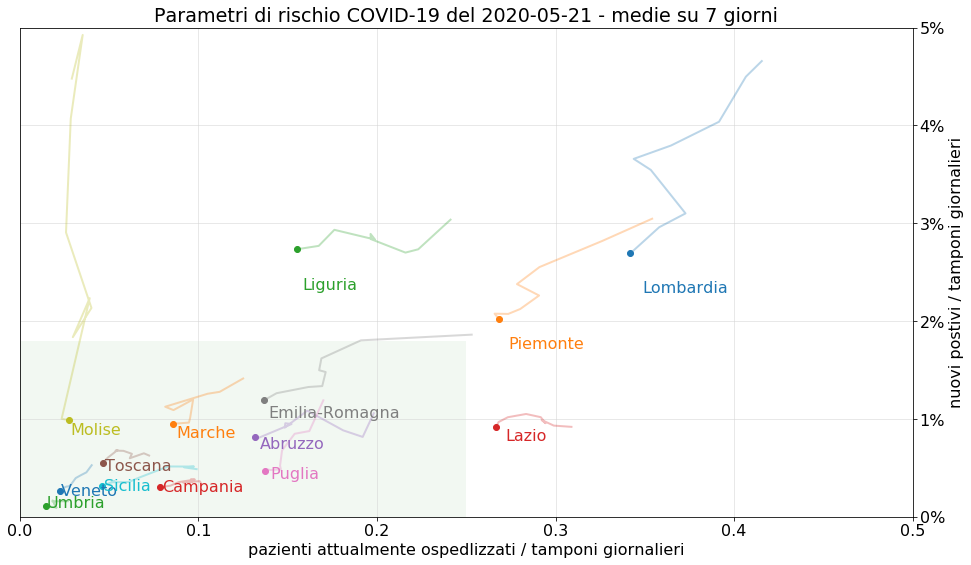

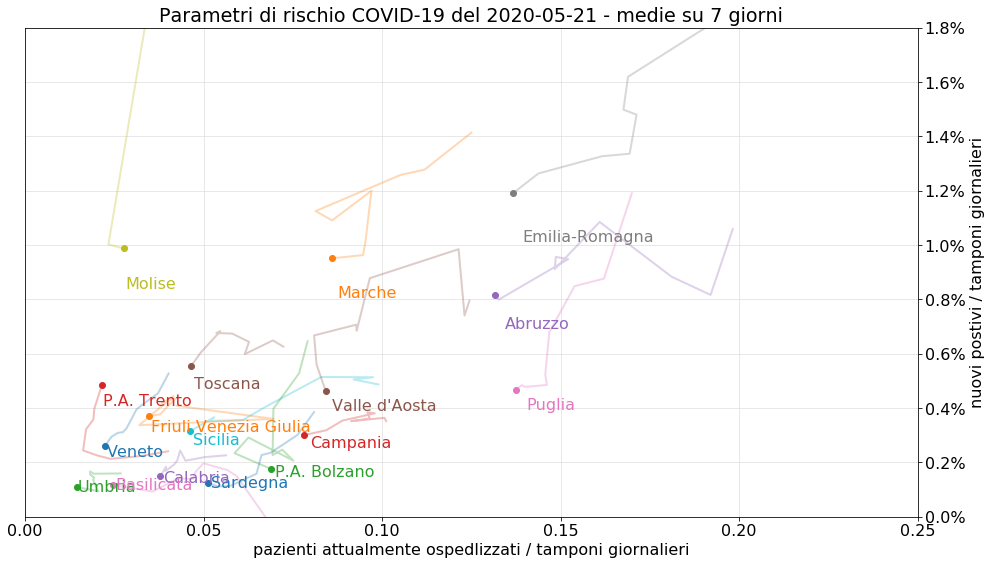

In [10]:
window = 7
rr = ds_italy_regions.isel(time=slice(-(window + 8), None)).rolling({'time': window}).mean().dropna('time')
it_rr = rr.sum('location')
rrr = ds_italy_regions
it_rrr = rrr.sum('location')
var = rr['daily_confirmed'] / np.maximum(rr['daily_tests'], 1)
it_var = it_rr['daily_confirmed'] / np.maximum(it_rr['daily_tests'], 1)
var1 = rrr['current_severe'] / np.maximum(rr['daily_tests'], 1)
it_var1 = it_rrr['current_severe'] / np.maximum(it_rr['daily_tests'], 1)
var2 = ((rrr['current_severe'] + rrr['current_critical']) / np.maximum(rrr['current_confirmed'], 1))

b = ['Veneto', 'Marche', 'Umbria', 'Campania', 'Abruzzo', 'Toscana', 'Puglia', 'Emilia-Romagna', 'Molise', 'Sicilia']
r =  b + ['Lombardia', 'Piemonte', 'Liguria', 'Lazio']
_, ax = covid19.plot.subplots()
ax.fill([0, 0.25, 0.25, 0], [0, 0, 0.018, 0.018], 'green', alpha=0.05)
covid19.plot.scatter_xarray(var1.sel(location=r), var, ax=ax)
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1., decimals=0))
_ = ax.set(
    title=f'Parametri di rischio COVID-19 del {str(var1.time.max().values)[:10]} - medie su {window} giorni',
    ylim=(0., 0.05), xlim=(0., 0.5),
    xlabel='pazienti attualmente ospedlizzati / tamponi giornalieri',
    ylabel='nuovi postivi / tamponi giornalieri',
)

rs = b + ['Sardegna', 'Friuli Venezia Giulia', 'P.A. Bolzano', 'P.A. Trento', 'Calabria', "Valle d'Aosta", 'Basilicata']
ax = covid19.plot.scatter_xarray(var1.sel(location=rs), var)
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1., decimals=1))
_ = ax.set(
    title=f'Parametri di rischio COVID-19 del {str(var1.time.max().values)[:10]} - medie su {window} giorni',
    ylim=(0., 0.018), xlim=(0., 0.25),
    xlabel='pazienti attualmente ospedlizzati / tamponi giornalieri',
    ylabel='nuovi postivi / tamponi giornalieri',
)

len(set(r) | set(rs))
#rr['current_severe'].isel(time=-1)

In [11]:
ds_italy_regions.sel(location='Molise').to_dataframe().tail(15)

current_severe  current_critical  deaths  current_confirmed  \
time                                                                      
2020-05-07               8                 0      22                170   
2020-05-08               6                 0      22                184   
2020-05-09               8                 0      22                205   
2020-05-10               9                 0      22                218   
2020-05-11              11                 0      22                229   
2020-05-12              13                 1      22                226   
2020-05-13               9                 1      22                231   
2020-05-14              10                 1      22                229   
2020-05-15               8                 2      22                227   
2020-05-16               8                 2      22                215   
2020-05-17              11                 2      22                216   
2020-05-18               9                 2      22                217   
2020-05-19               9                 2      22                212   
2020-05-20               7                 2      22                198   
2020-05-21               8                 2      22                194   

            confirmed  tests   tested  dimessi_guariti  population  mortality  \
time                                                                            
2020-05-07        305   8237   7912.0              113      310449   0.070865   
2020-05-08        327   8502   8177.0              121      310449   0.070865   
2020-05-09        347   8691   8375.0              120      310449   0.070865   
2020-05-10        370   9164   9008.0              130      310449   0.070865   
2020-05-11        383   9390   9247.0              132      310449   0.070865   
2020-05-12        386   9981   9582.0              138      310449   0.070865   
2020-05-13        401  10062   9773.0              148      310449   0.070865   
2020-05-14        403  10227  10052.0              152      310449   0.070865   
2020-05-15        407  10468  10281.0              158      310449   0.070865   
2020-05-16        410  10859  10666.0              173      310449   0.070865   
2020-05-17        411  11085  10892.0              173      310449   0.070865   
2020-05-18        422  11514  11285.0              183      310449   0.070865   
2020-05-19        422  11592  11354.0              188      310449   0.070865   
2020-05-20        422  12158  11727.0              202      310449   0.070865   
2020-05-21        423  12253  11819.0              207      310449   0.070865   

            daily_deaths  daily_confirmed  daily_tests  \
time                                                     
2020-05-07           0.0              1.0        341.0   
2020-05-08           0.0             22.0        265.0   
2020-05-09           0.0             20.0        189.0   
2020-05-10           0.0             23.0        473.0   
2020-05-11           0.0             13.0        226.0   
2020-05-12           0.0              3.0        591.0   
2020-05-13           0.0             15.0         81.0   
2020-05-14           0.0              2.0        165.0   
2020-05-15           0.0              4.0        241.0   
2020-05-16           0.0              3.0        391.0   
2020-05-17           0.0              1.0        226.0   
2020-05-18           0.0             11.0        429.0   
2020-05-19           0.0              0.0         78.0   
2020-05-20           0.0              0.0        566.0   
2020-05-21           0.0              1.0         95.0   

            diff_current_confirmed  daily_tested location        lat  \
time                                                                   
2020-05-07                    -9.0         308.0   Molise  41.557748   
2020-05-08                    14.0         265.0   Molise  41.557748   
2020-05-09                    21.0         198.0   Molise  41.557748   
2020-05-10 

21

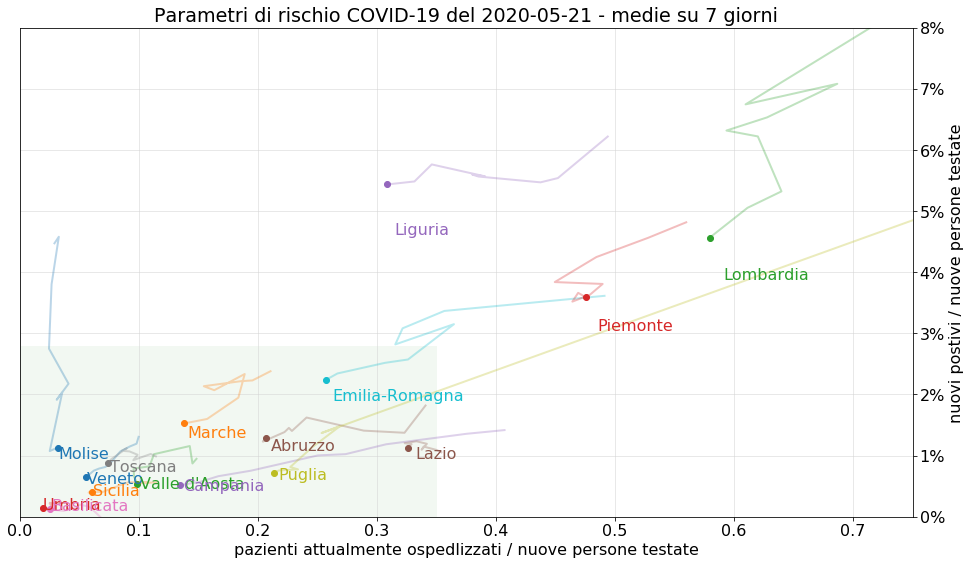

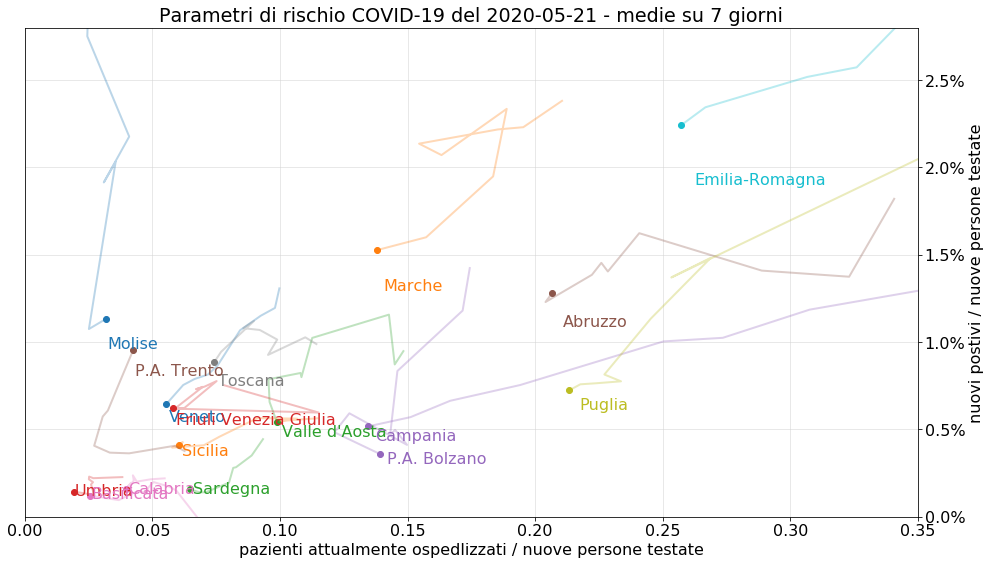

In [12]:
window = 7
rr = ds_italy_regions.isel(time=slice(-(window + 8), None)).rolling({'time': window}).mean().dropna('time')
it_rr = rr.sum('location')
rrr = ds_italy_regions
it_rrr = rrr.sum('location')
var = rr['daily_confirmed'] / np.maximum(rr['daily_tested'], 1)
it_var = it_rr['daily_confirmed'] / np.maximum(it_rr['daily_tested'], 1)
var1 = rrr['current_severe'] / np.maximum(rr['daily_tested'], 1)
it_var1 = it_rrr['current_severe'] / np.maximum(it_rr['daily_tested'], 1)
var2 = ((rrr['current_severe'] + rrr['current_critical']) / np.maximum(rrr['current_confirmed'], 1))

b = ['Veneto', 'Marche', "Valle d'Aosta", 'Umbria', 'Campania', 'Abruzzo', 'Basilicata', 'Toscana', 'Puglia', 'Emilia-Romagna', 'Molise', 'Sicilia']
r =  b + ['Lombardia', 'Piemonte', 'Liguria', 'Lazio']
_, ax = covid19.plot.subplots()
ax.fill([0, 0.35, 0.35, 0], [0, 0, 0.028, 0.028], 'green', alpha=0.05)
covid19.plot.scatter_xarray(var1.sel(location=r), var, ax=ax)
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1., decimals=0))
_ = ax.set(
    title=f'Parametri di rischio COVID-19 del {str(var1.time.max().values)[:10]} - medie su {window} giorni',
    ylim=(0., 0.08), xlim=(0., 0.75),
    xlabel='pazienti attualmente ospedlizzati / nuove persone testate',
    ylabel='nuovi postivi / nuove persone testate',
)

rs = b + ['Sardegna', 'Friuli Venezia Giulia', 'P.A. Bolzano', 'P.A. Trento', 'Calabria']
ax = covid19.plot.scatter_xarray(var1.sel(location=rs), var)
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1., decimals=1))
_ = ax.set(
    title=f'Parametri di rischio COVID-19 del {str(var1.time.max().values)[:10]} - medie su {window} giorni',
    ylim=(0., 0.028), xlim=(0., 0.35),
    xlabel='pazienti attualmente ospedlizzati / nuove persone testate',
    ylabel='nuovi postivi / nuove persone testate',
)

len(set(r) | set(rs))
#rr['current_severe'].isel(time=-1)

In [13]:
ds_italy_regions.sel(location='Lazio').to_dataframe().tail(12)

current_severe  current_critical  deaths  current_confirmed  \
time                                                                      
2020-05-10            1265                84     557               4286   
2020-05-11            1266                83     562               4294   
2020-05-12            1258                84     566               4273   
2020-05-13            1224                83     577               4235   
2020-05-14            1178                79     595               4096   
2020-05-15            1173                79     604               4088   
2020-05-16            1156                76     616               4022   
2020-05-17            1150                74     622               3910   
2020-05-18            1137                73     628               3826   
2020-05-19            1124                74     640               3786   
2020-05-20            1119                74     647               3786   
2020-05-21            1110                68     662               3637   

            confirmed   tests    tested  dimessi_guariti  population  \
time                                                                   
2020-05-10       7165  178569  141233.0             2322     5898124   
2020-05-11       7190  181398  143970.0             2334     5898124   
2020-05-12       7212  185085  147010.0             2373     5898124   
2020-05-13       7250  188632  150097.0             2438     5898124   
2020-05-14       7291  192917  153894.0             2600     5898124   
2020-05-15       7364  197599  157880.0             2672     5898124   
2020-05-16       7396  201938  161405.0             2758     5898124   
2020-05-17       7446  206166  164779.0             2914     5898124   
2020-05-18       7485  209472  167859.0             3031     5898124   
2020-05-19       7505  213877  171353.0             3079     5898124   
2020-05-20       7533  217849  173903.0             3100     5898124   
2020-05-21       7558  222071  177749.0             3259     5898124   

            mortality  daily_deaths  daily_confirmed  daily_tests  \
time                                                                
2020-05-10   0.094437           4.0             32.0       4121.0   
2020-05-11   0.095285           5.0             25.0       2829.0   
2020-05-12   0.095963           4.0             22.0       3687.0   
2020-05-13   0.097828          11.0             38.0       3547.0   
2020-05-14   0.100880          18.0             41.0       4285.0   
2020-05-15   0.102405           9.0             73.0       4682.0   
2020-05-16   0.104440          12.0             32.0       4339.0   
2020-05-17   0.105457           6.0             50.0       4228.0   
2020-05-18   0.106475           6.0             39.0       3306.0   
2020-05-19   0.108509          12.0             20.0       4405.0   
2020-05-20   0.109696           7.0             28.0       3972.0   
2020-05-21   0.112239          15.0             25.0       4222.0   

            diff_current_confirmed  daily_tested location       lat  \
time                                                                  
2020-05-10                   -59.0        3805.0    Lazio  41.89277   
2020-05-11                     8.0        2737.0    Lazio  41.89277   
2020-05-12                   -21.0        3040.0    Lazio  41.89277   
2020-05-13                   -38.0        3087.0    Lazio  41.89277   
2020-05-14                  -139.0        3797.0    Lazio  41.89277   
2020-05-15                    -8.0        3986.0    Lazio  41.89277   
2020-05-16                   -66.0        3525.0    Lazio  41.89277   
2020-05-17                  -112.0        3374.0    Lazio  41.89277   
2020-05-18                   -84.0        3080.0    Lazio  41.89277   
2020-05-19                   -40.0        3494.0    Lazio  41.89277   
2020-05-20                     0.0        2550.0    Lazio  41.89277   
2020-05-21                  -149.0        3846.0    Lazio  41.

In [14]:
DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())

START_FIT = '2020-02-23'
STOP_FIT = '2020-04-01'

SHOWUNTIL = ds_italy.time[-1].values + 3 * DAY

EXTRAPOLATE = (np.datetime64('2020-02-23'), SHOWUNTIL)
XLIM = EXTRAPOLATE

FIT_PARAMS = {
    'current_severe': [None, '2020-03-07', '2020-03-08', '2020-03-20'],
    'current_critical': 0,
    'daily_deaths': 0,
}
RATIO = {
    'current_severe': 35,
    'current_critical': 6,
    'daily_deaths': 1,
}
LABEL = {
    'current_severe': 'Pazienti attualmente ricoverati in reparto',
    'current_critical': 'Pazienti attualmente in terapia intensiva',
    'daily_deaths': 'Decessi giornalieri',
}

In [15]:
fits = {}
for kind, breaks in FIT_PARAMS.items():
    if isinstance(breaks, int):
        breaks = [np.datetime64(b) + breaks * DAY if b is not None else b for b in FIT_PARAMS['current_severe']]
    fits[kind] = covid19.fit.fit_exponential_segments(ds_italy[kind], breaks=breaks)


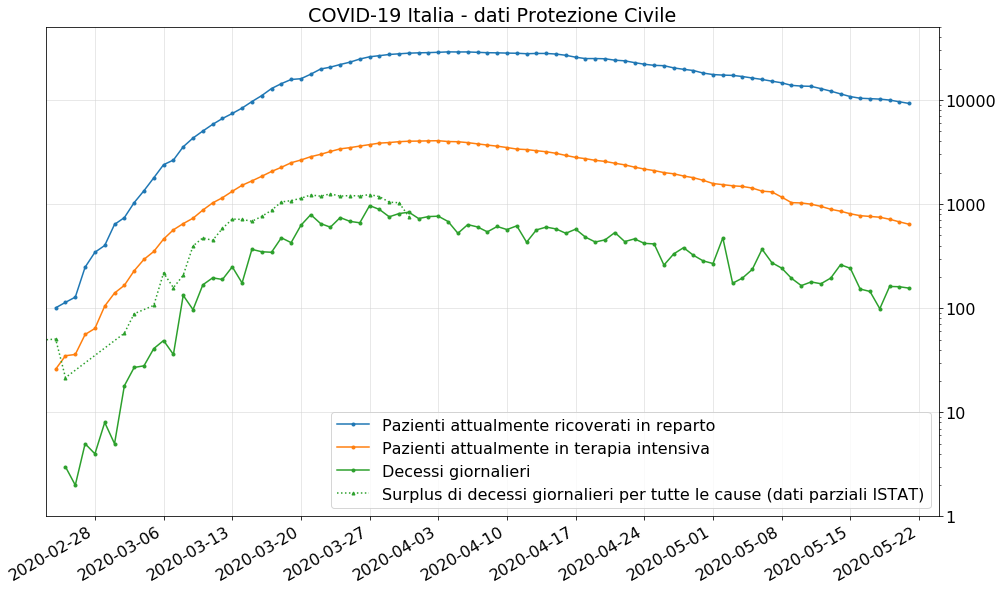

In [16]:
_, ax = covid19.plot.subplots(subplot_kw={'xlim': XLIM})
ax.set(yscale='log', ylim=(1, 50000)) 

for (kind, fits_kind), color in zip(fits.items(), PALETTE_ONE):
    label = LABEL[kind]
    covid19.plot.plot_data(ax, ds_italy[kind], label=label, color=color)

covid19.plot.plot_data(ax, istat_italy, label='Surplus di decessi giornalieri per tutte le cause (dati parziali ISTAT)', color=color, marker='^', linestyle=':', date_interval=7)
    
_ = ax.set_title(f'COVID-19 Italia - dati Protezione Civile')
_ = ax.set(xlabel="", ylabel="")
_ = ax.legend()

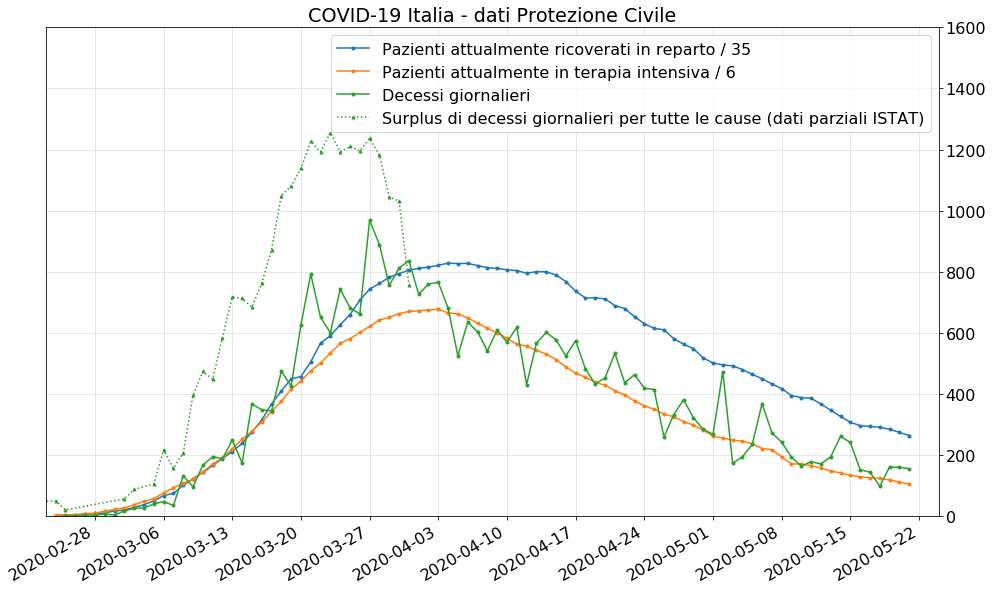

In [17]:
_, ax = covid19.plot.subplots(1, subplot_kw={'xlim': XLIM, 'ylim': (0, 1600)})

for (kind, fits_kind), color in zip(fits.items(), PALETTE_ONE):
    label = LABEL[kind] + ('' if RATIO[kind] == 1 else f' / {RATIO[kind]}')
    covid19.plot.plot_data(ax, ds_italy[kind] / RATIO[kind], label=label, color=color)

covid19.plot.plot_data(ax, istat_italy, label='Surplus di decessi giornalieri per tutte le cause (dati parziali ISTAT)', color=color, marker='^', linestyle=':', date_interval=7)

_ = ax.set_title(f'COVID-19 Italia - dati Protezione Civile')
_ = ax.set(xlabel="", ylabel="")
_ = ax.legend()
_ = ax.set(ylim=(0, None))

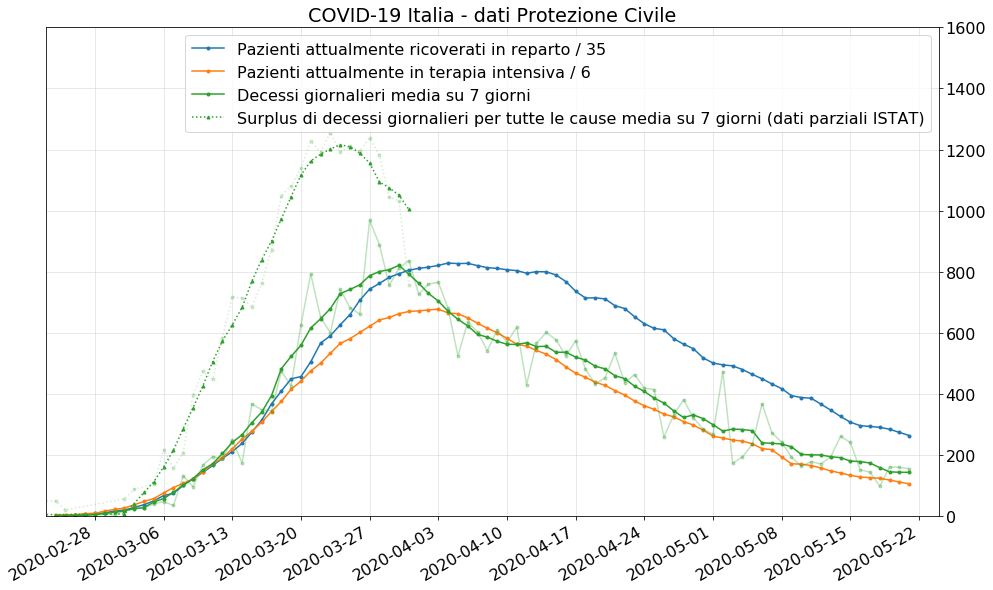

In [18]:
_, ax = covid19.plot.subplots(1, subplot_kw={'xlim': XLIM, 'ylim': (0, 1600)})

for (kind, fits_kind), color in zip(fits.items(), PALETTE_ONE):
    label = LABEL[kind] + ('' if RATIO[kind] == 1 else f' / {RATIO[kind]}')
    if kind == 'daily_deaths':
        covid19.plot.plot_data(ax, ds_italy[kind] / RATIO[kind], color=color, alpha=0.3)
        covid19.plot.plot_data(ax, ds_italy[kind].rolling({'time': 7}, center=True, min_periods=1).mean() / RATIO[kind], label=label + ' media su 7 giorni', color=color)
    else:
        covid19.plot.plot_data(ax, ds_italy[kind] / RATIO[kind], label=label, color=color)

covid19.plot.plot_data(ax, istat_italy, color=color, linestyle=':', alpha=0.2)
covid19.plot.plot_data(ax, istat_italy.rolling({'time': 7}, center=True, min_periods=1).mean(), color=color, label='Surplus di decessi giornalieri per tutte le cause media su 7 giorni (dati parziali ISTAT)', marker='^', linestyle=':', date_interval=7)

_ = ax.set_title(f'COVID-19 Italia - dati Protezione Civile')
_ = ax.set(xlabel="", ylabel="")
_ = ax.legend()
_ = ax.set(ylim=(0, None))

In [19]:
REGIONS_FIT_PARAMS = {
    'Lombardia': {
        'current_severe': [None, '2020-03-07', '2020-03-08', '2020-03-18'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Emilia-Romagna': {
        'current_severe': [None, '2020-03-06', '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': [None, '2020-03-23'],
    },
    'Piemonte': {
        'current_severe': [None, '2020-03-20', '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Veneto': {
        'current_severe': [None, '2020-03-13', '2020-03-14', '2020-03-24'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Marche': {
        'current_severe': [None, '2020-03-16', '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Liguria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Toscana': {
        'current_severe': [None, '2020-03-19'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Lazio': {
        'current_severe': [None, '2020-03-21', '2020-03-28'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'P.A. Trento': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Campania': {
        'current_severe': [None, '2020-03-26'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Puglia': {
        'current_severe': [None, '2020-03-16', '2020-03-26'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Sicilia': {
        'current_severe': [None, '2020-03-21', None],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Abruzzo': {
        'current_severe': [None, '2020-03-21', None],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Friuli Venezia Giulia': {
        'current_severe': [None, '2020-03-16', '2020-03-24', None],
        'current_critical': 0,
        'daily_deaths': ['2020-03-20', '2020-03-31', None],
    },
    'P.A. Bolzano': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Umbria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Calabria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Sardegna': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Valle d\'Aosta': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Basilicata': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Molise': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
}

In [20]:
STOP_FIT = '2020-04-03'

region_fits = {}
for region, params in REGIONS_FIT_PARAMS.items():
    region_fits[region] = {}
    for kind, breaks in params.items():
        if isinstance(breaks, int):
            breaks = [np.datetime64(b) + breaks * DAY if b is not None else b for b in params['current_severe']]
        region_fits[region][kind] = covid19.fit.fit_exponential_segments(ds_italy_regions.sel(location=region)[kind], breaks=breaks)

skipping start=None stop=2020-03-15T00:00:00
skipping start=None stop=2020-03-19T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-20T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-20T00:00:00
skipping start=None stop=2020-03-24T00:00:00


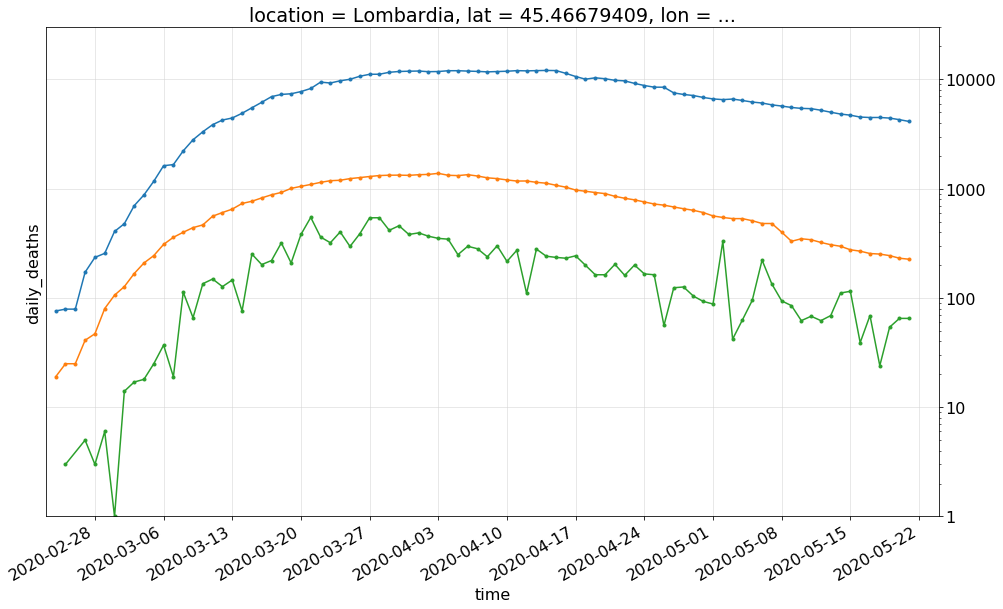

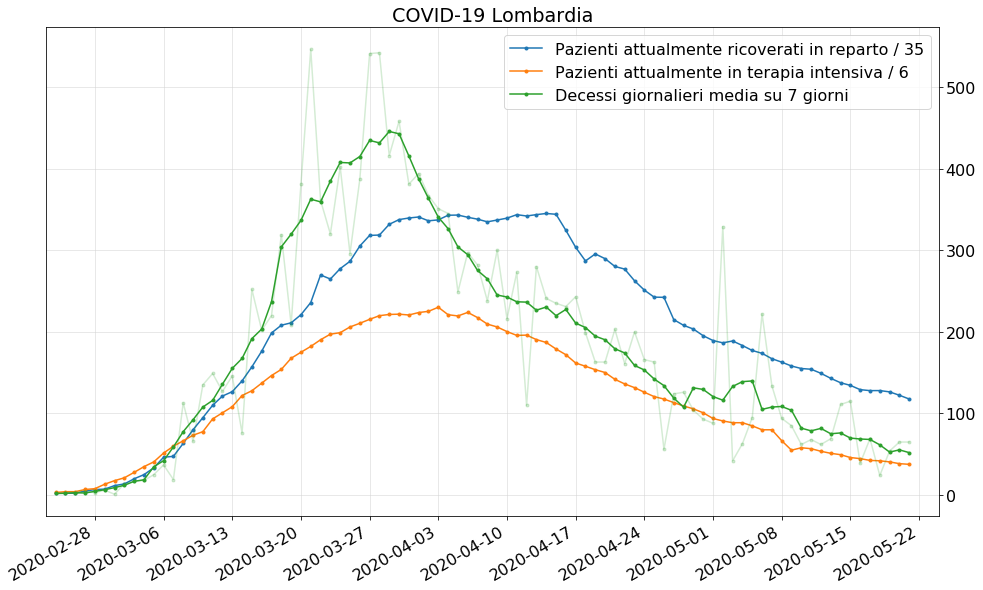

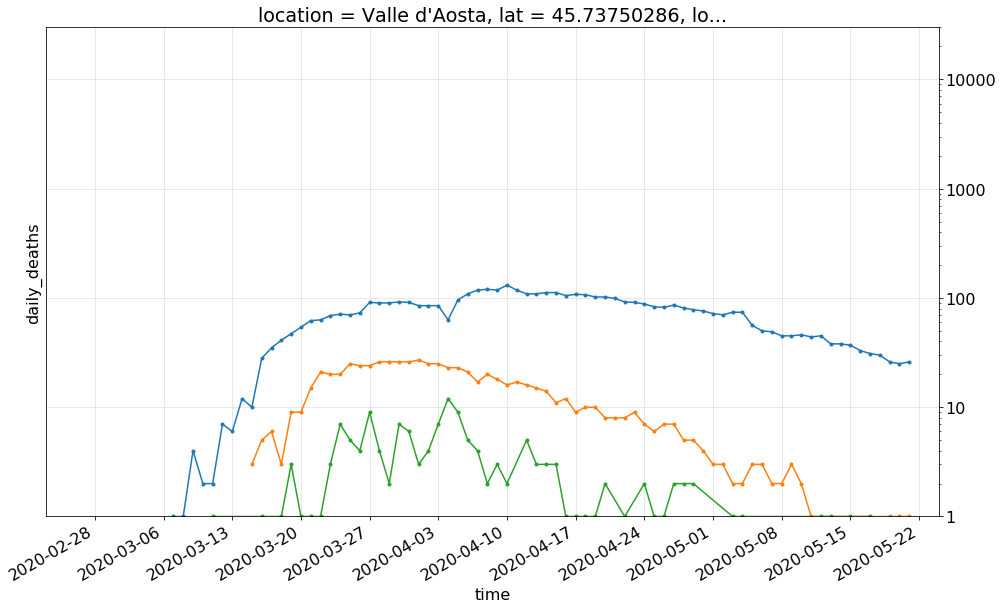

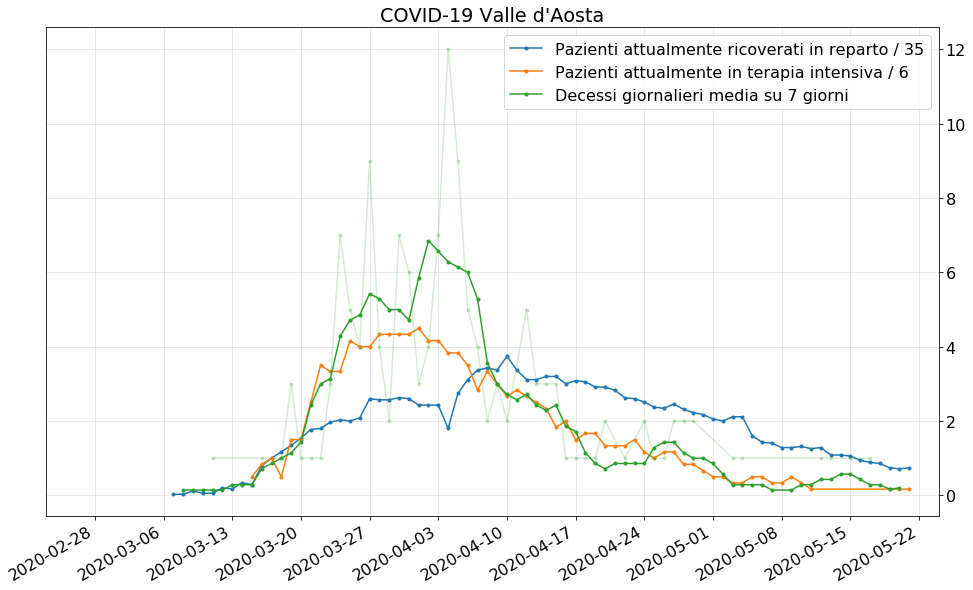

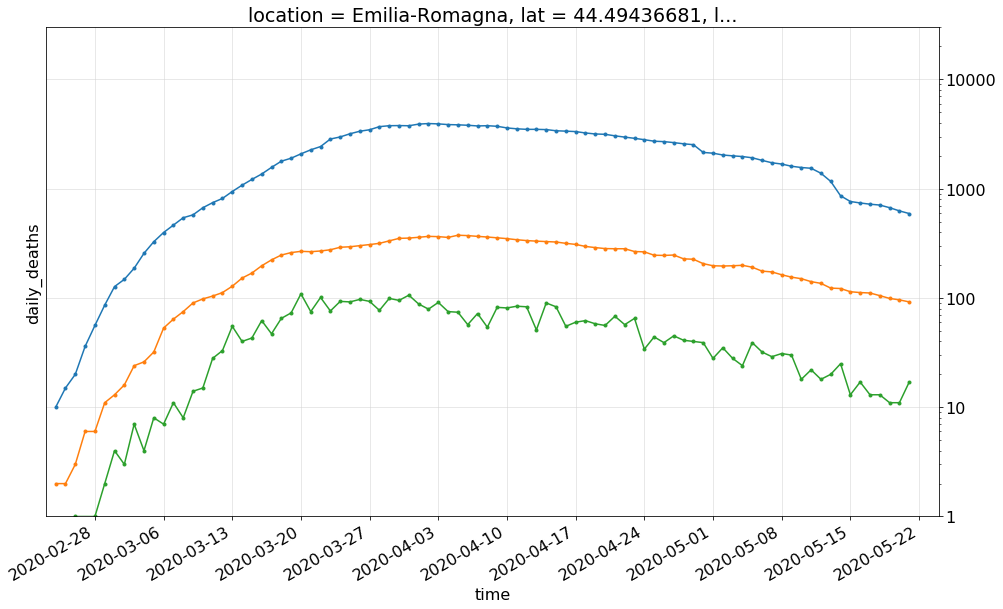

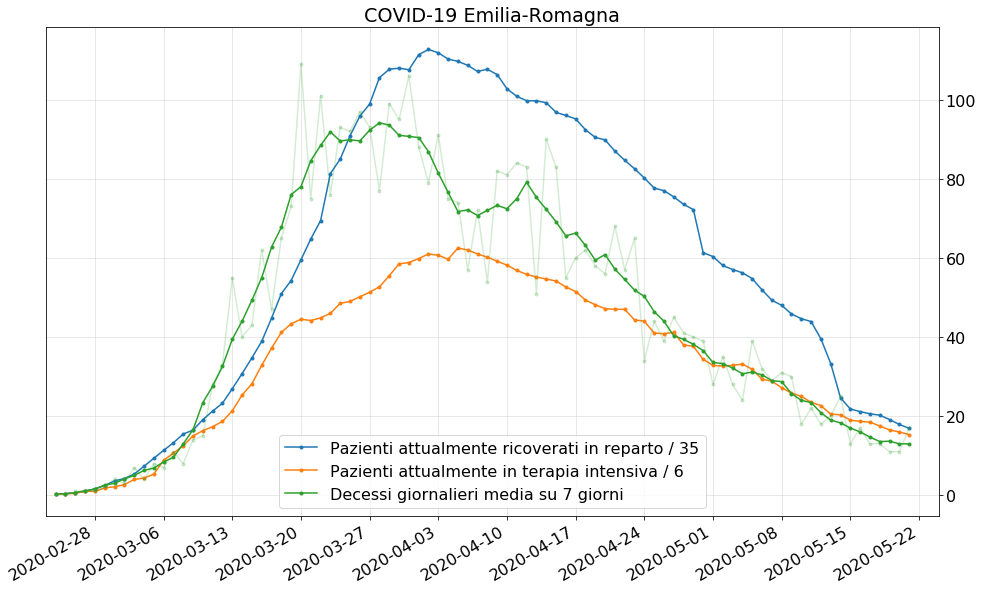

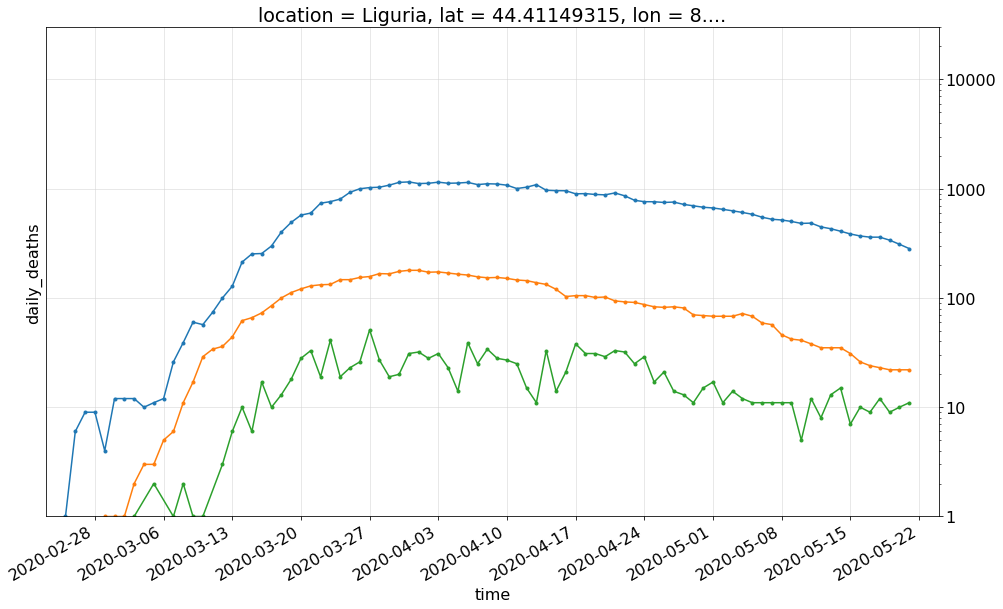

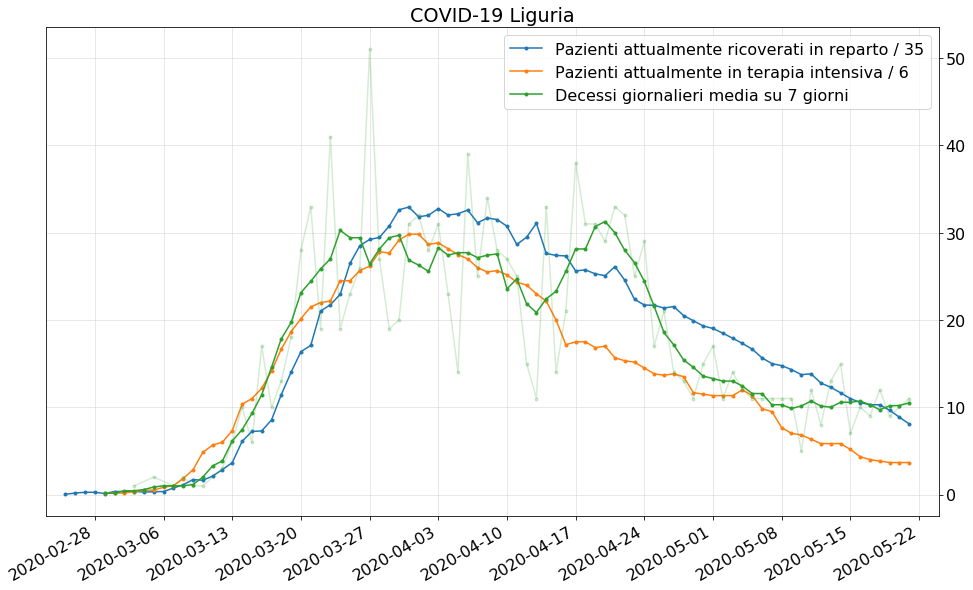

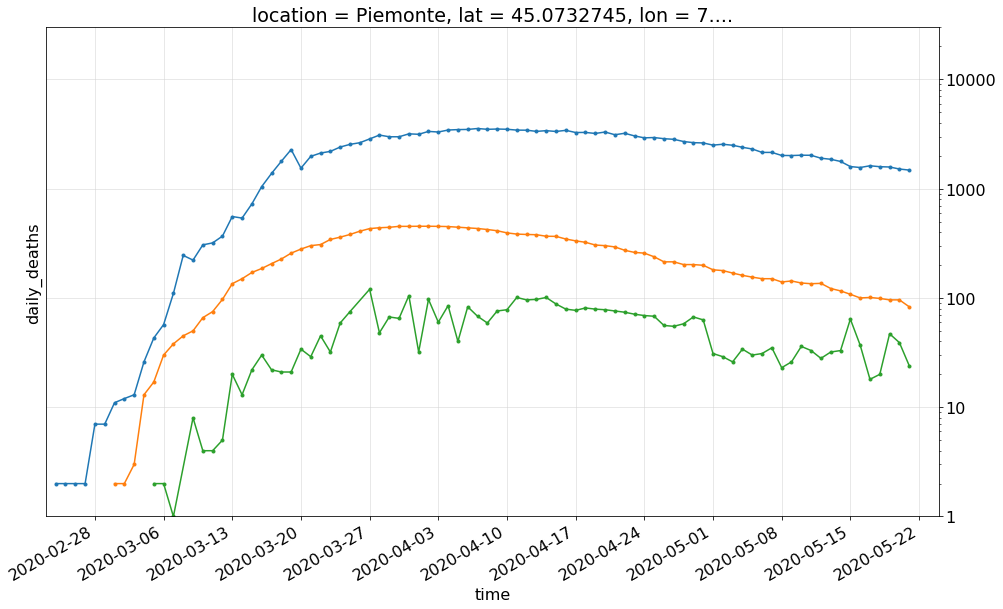

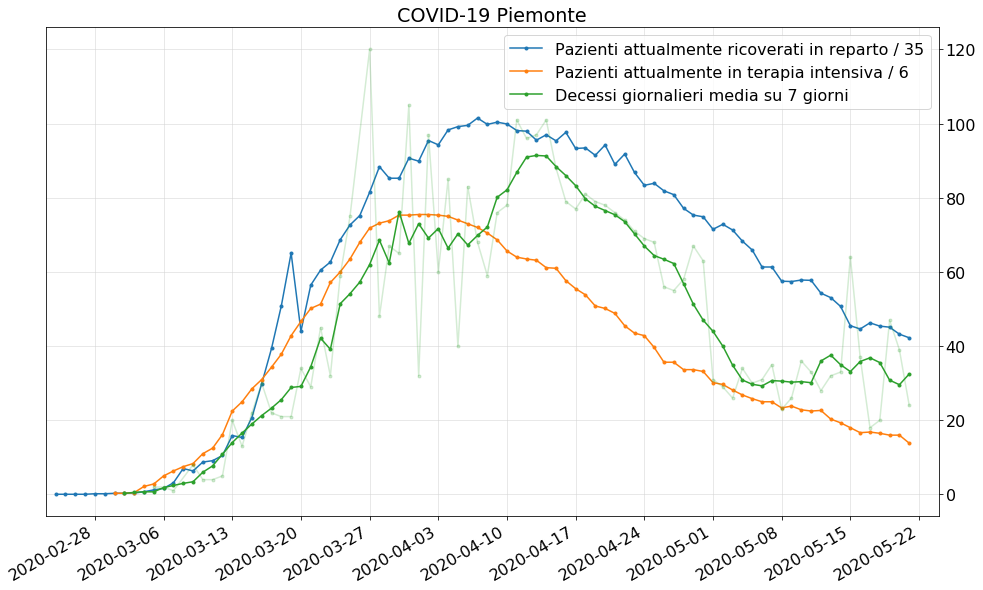

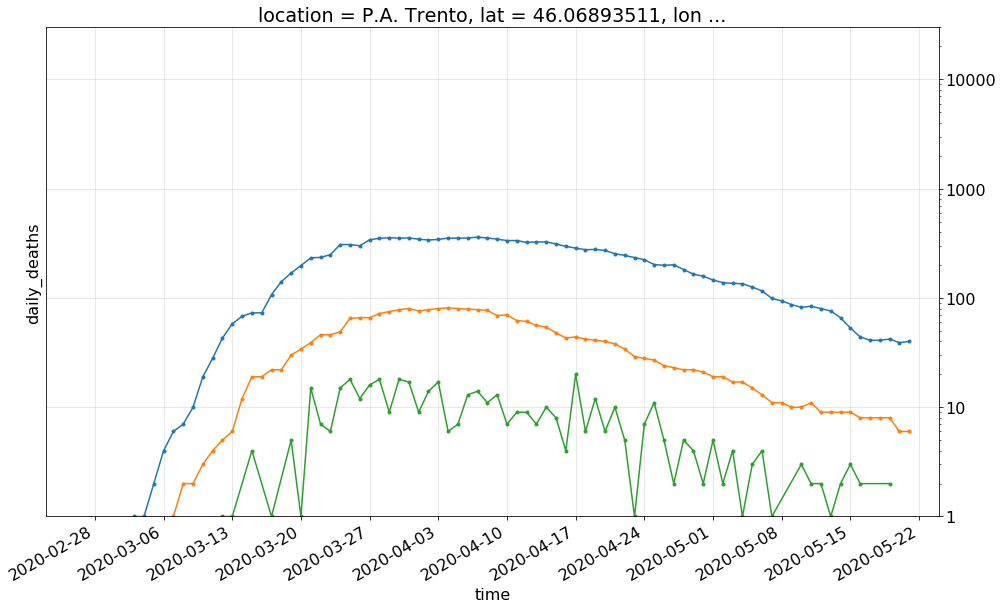

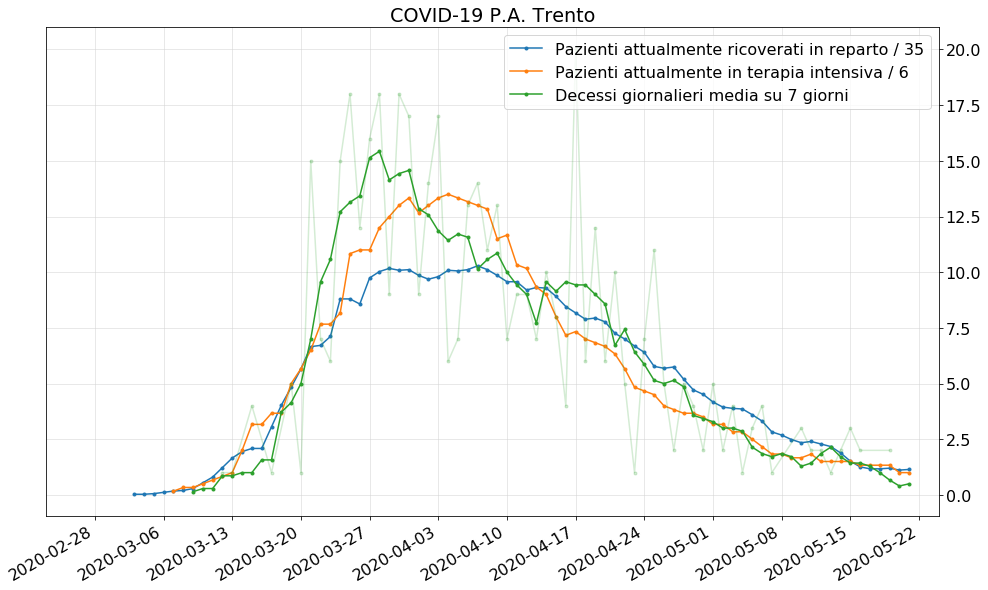

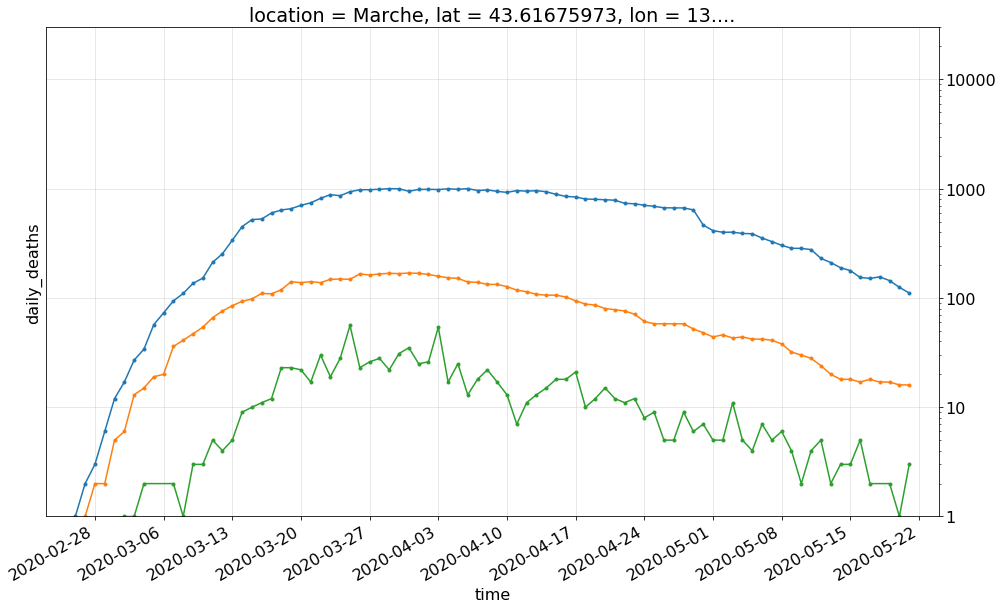

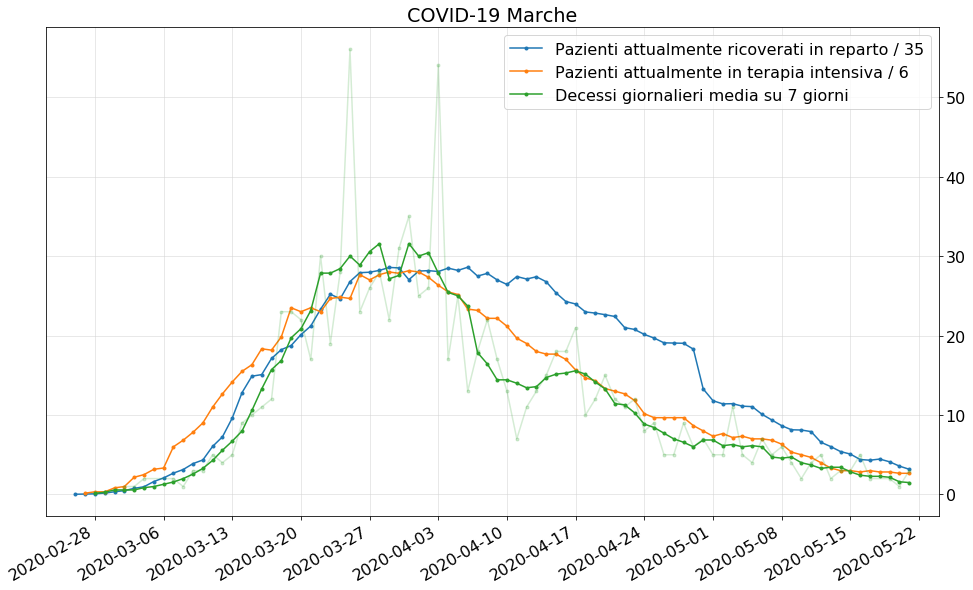

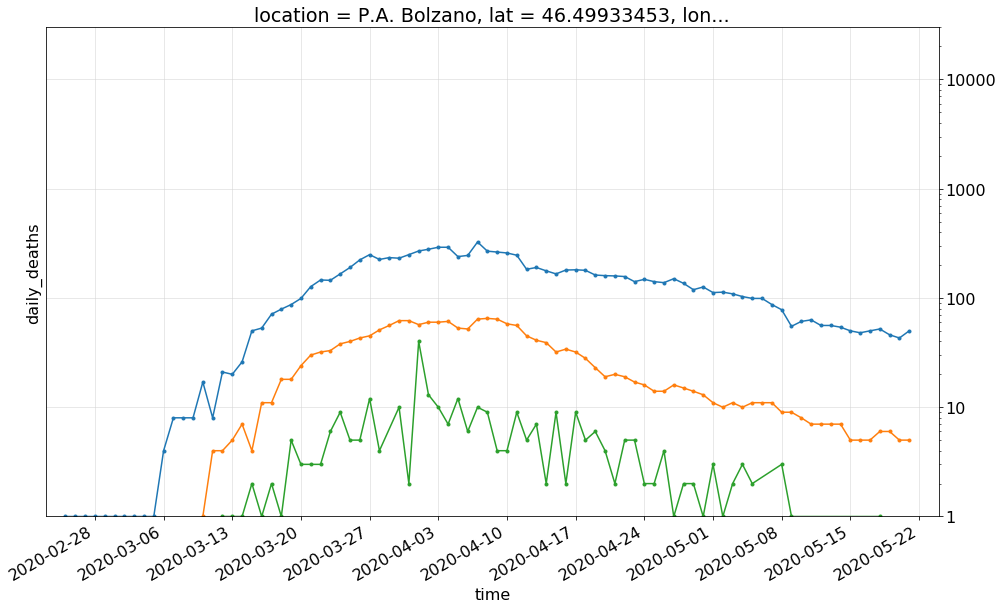

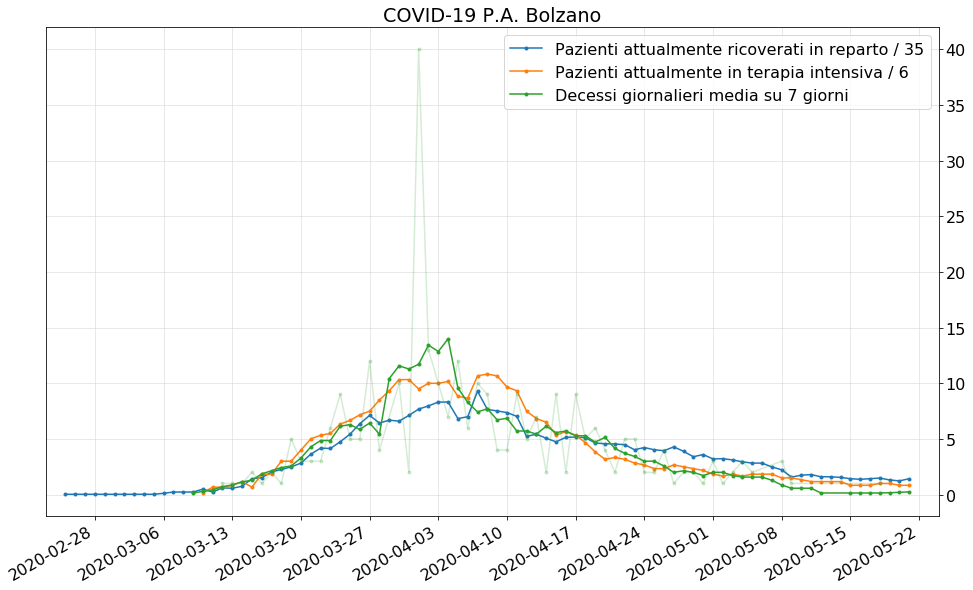

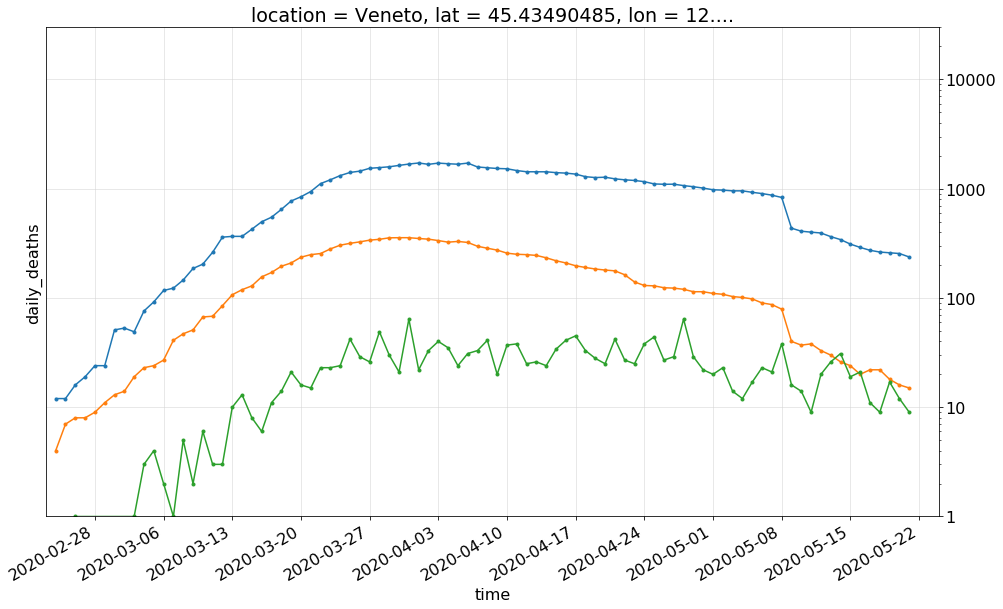

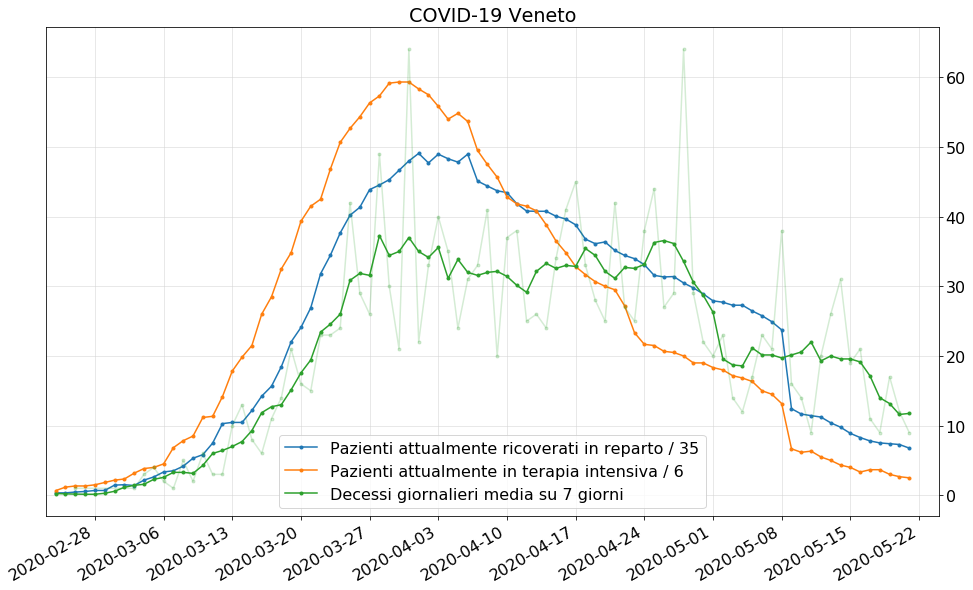

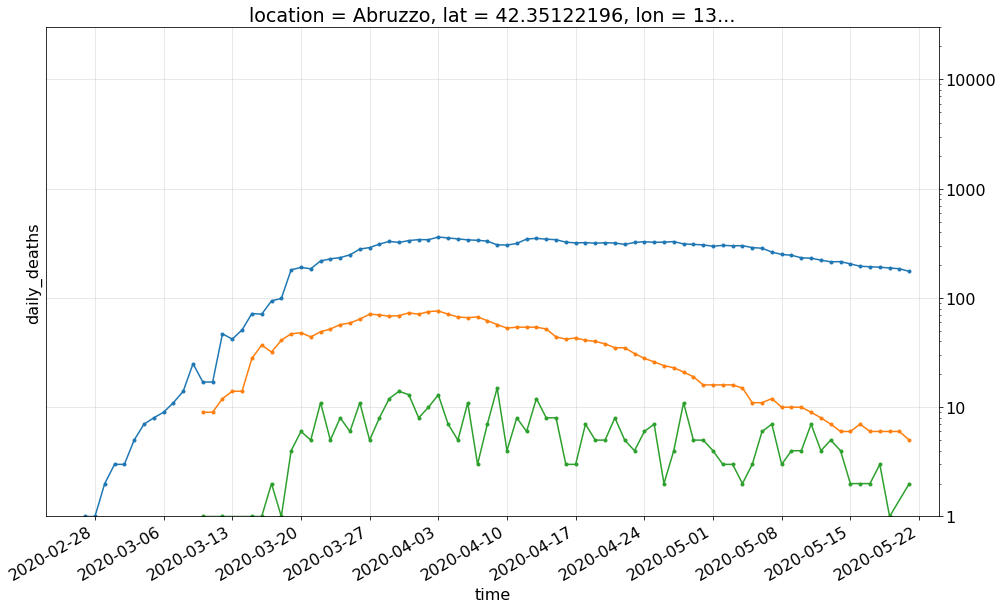

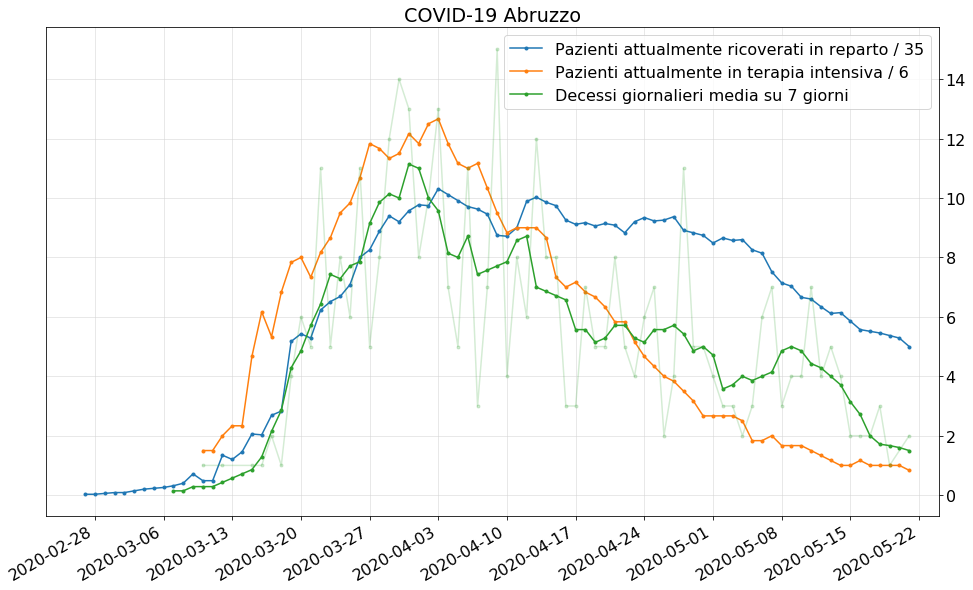

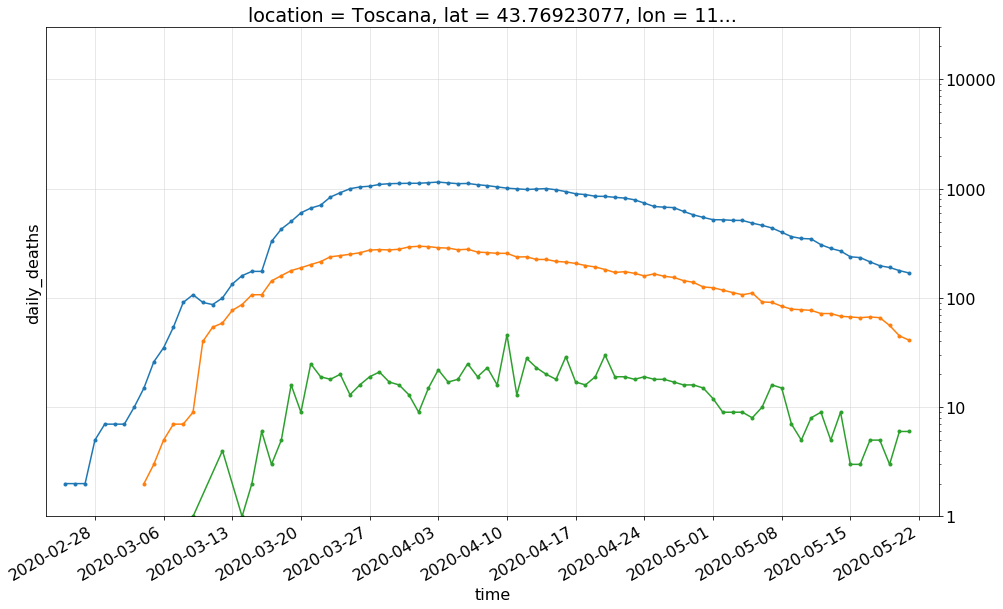

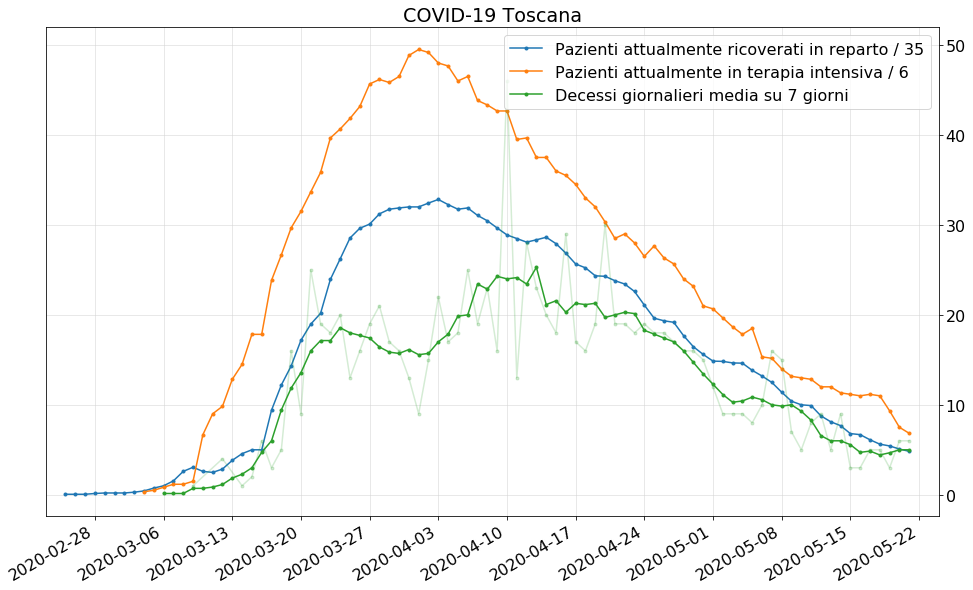

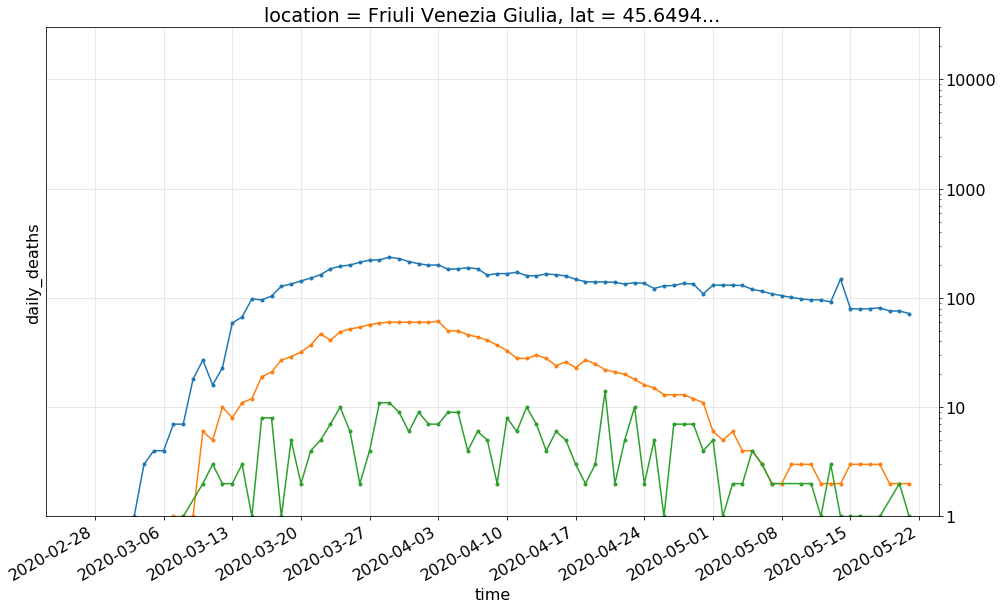

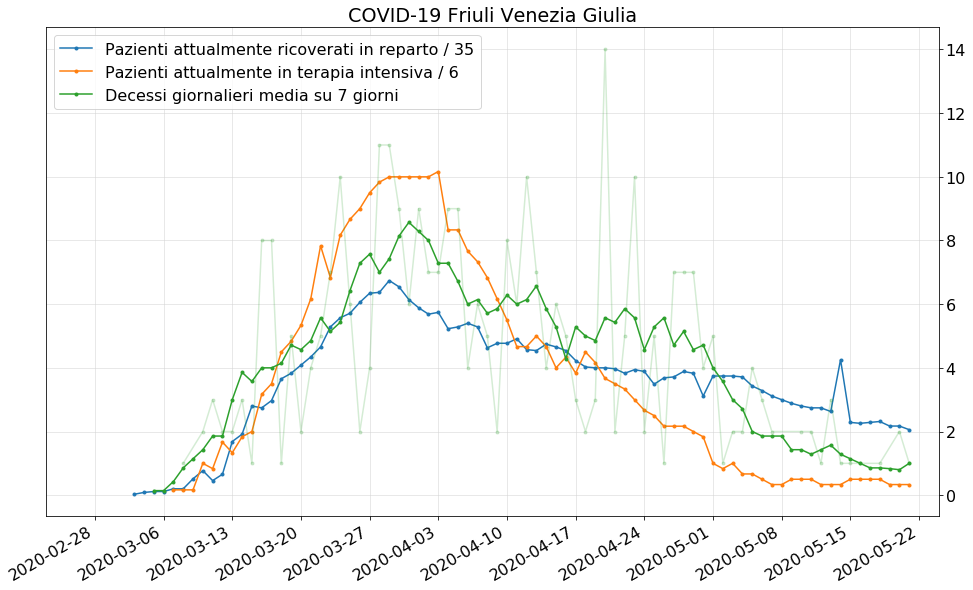

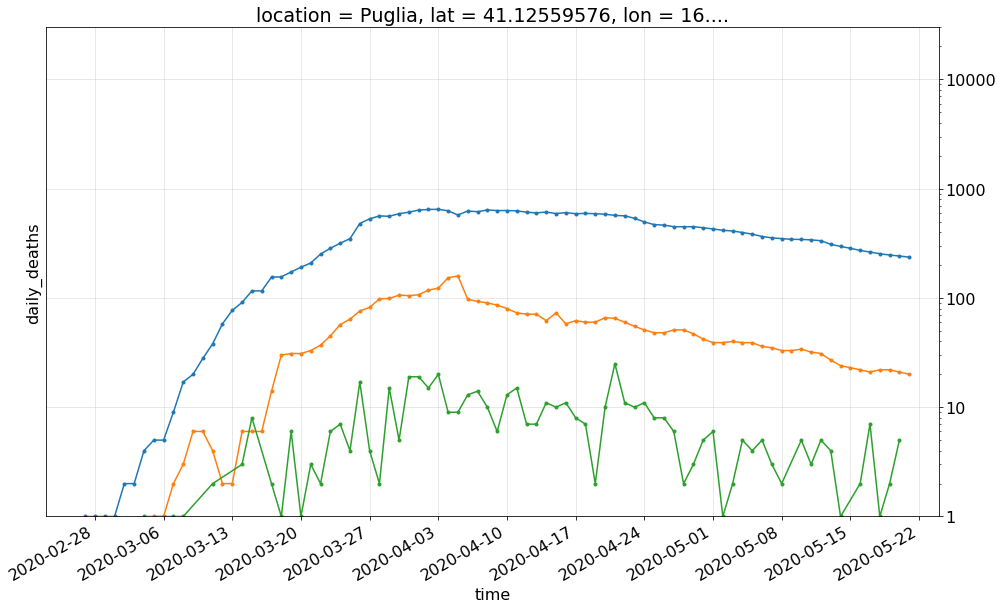

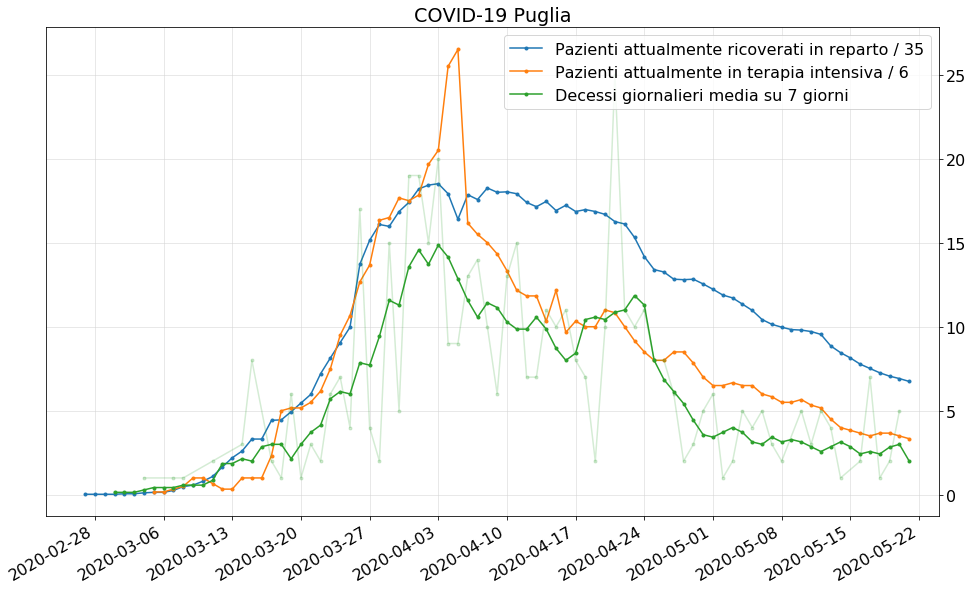

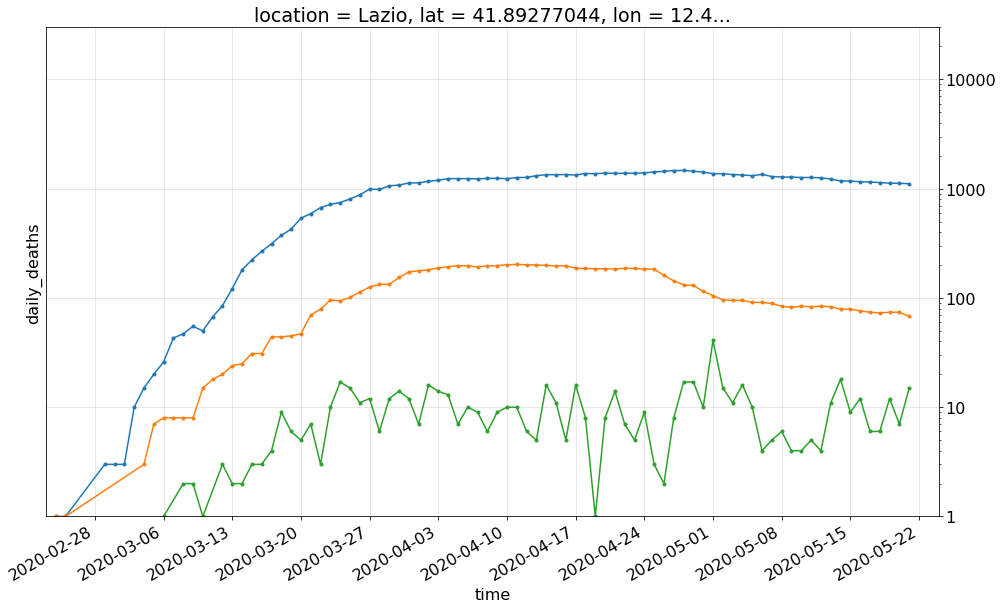

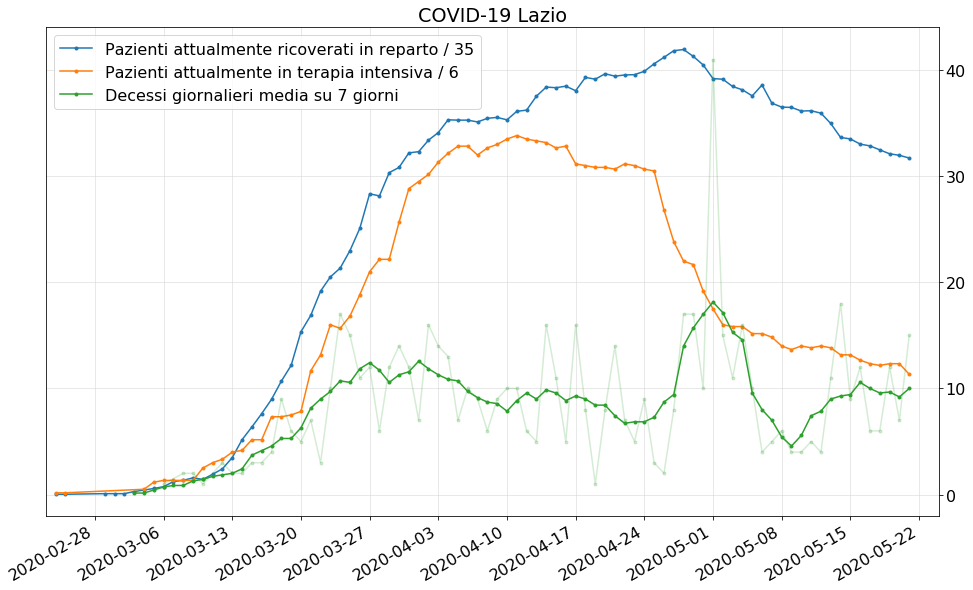

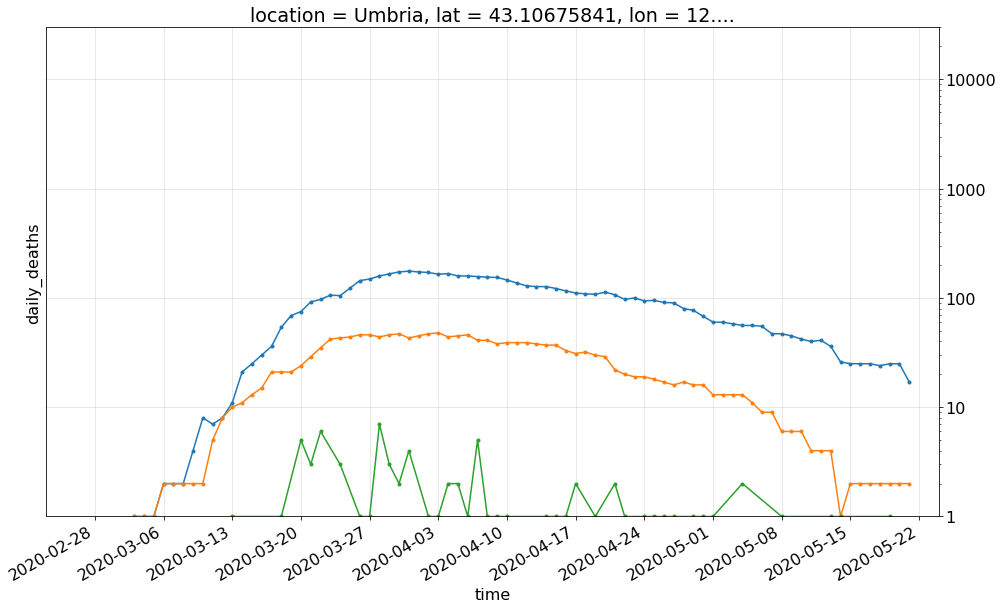

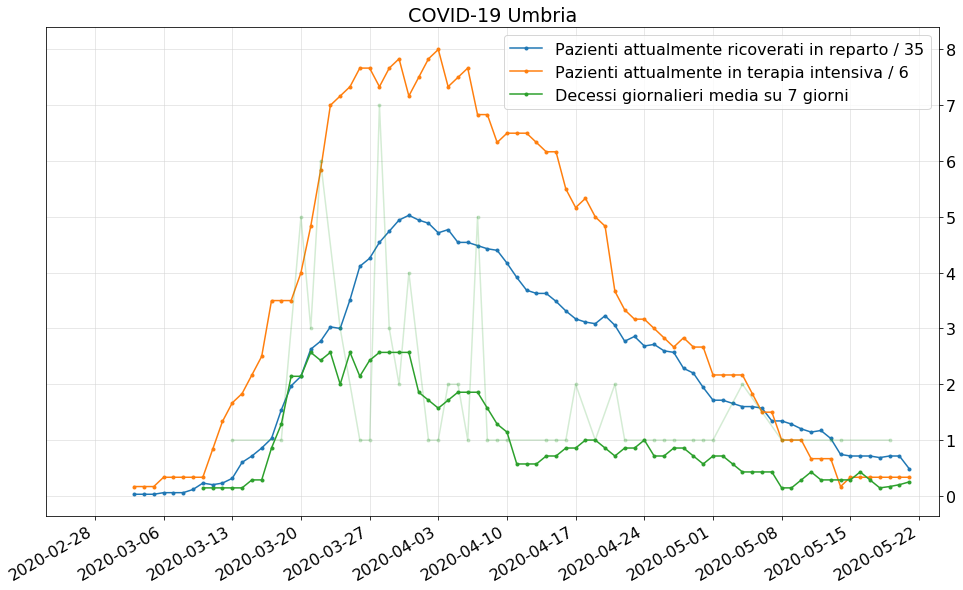

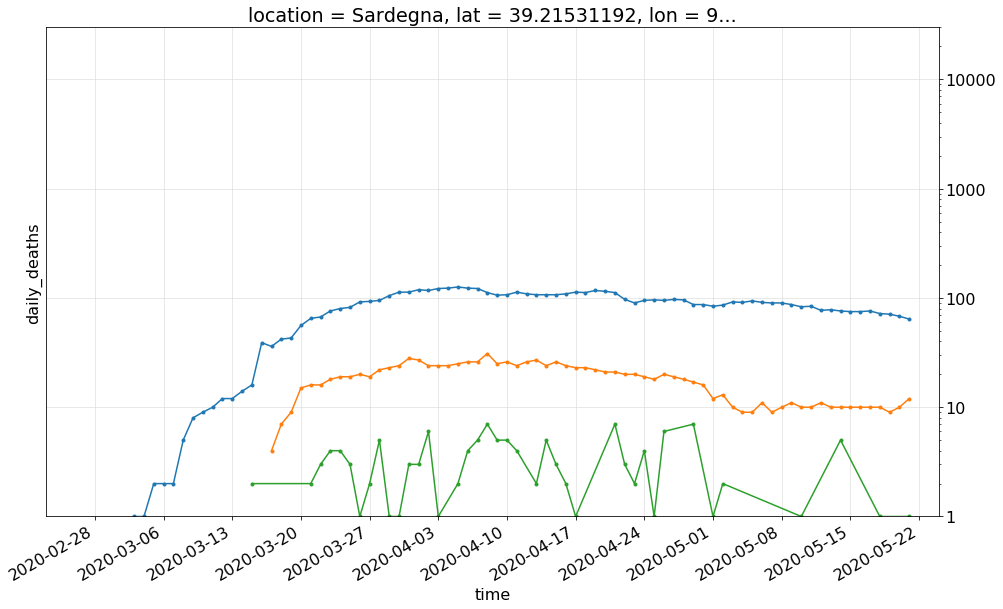

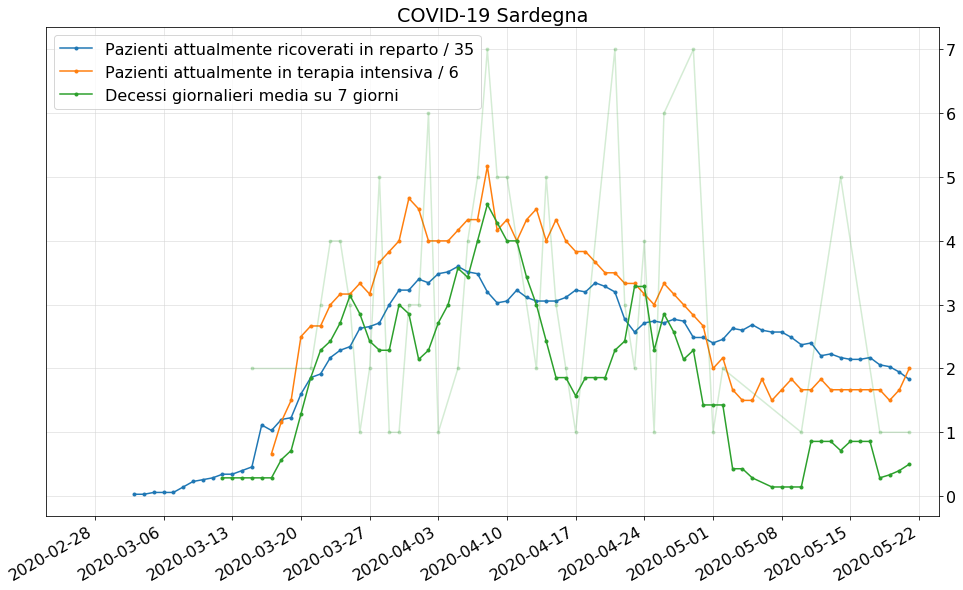

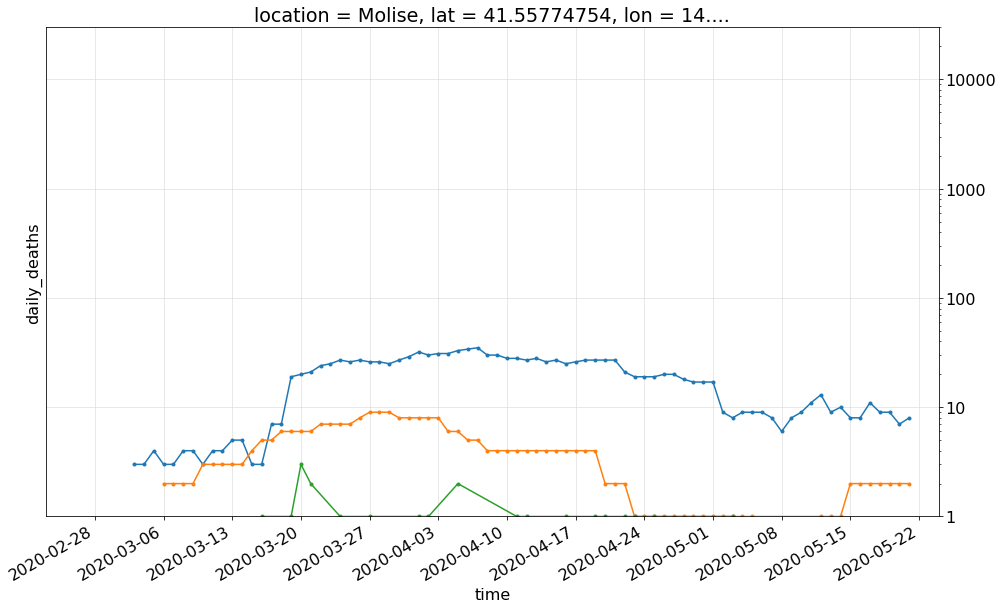

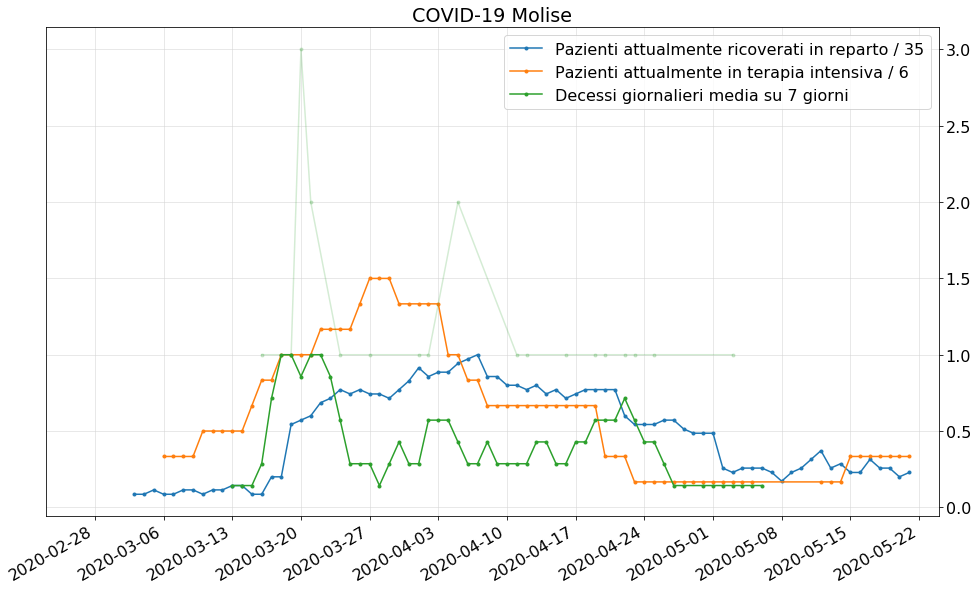

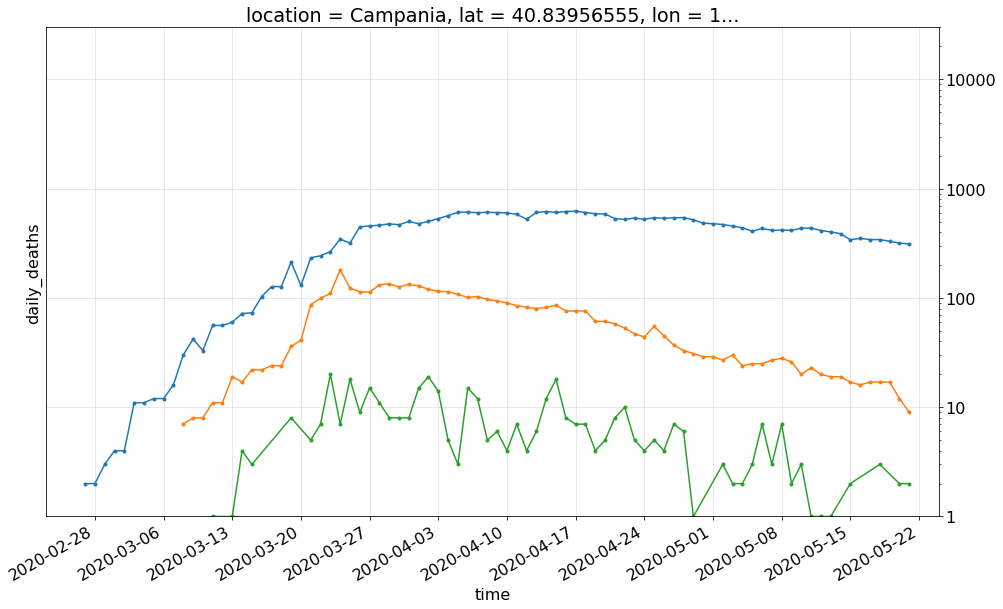

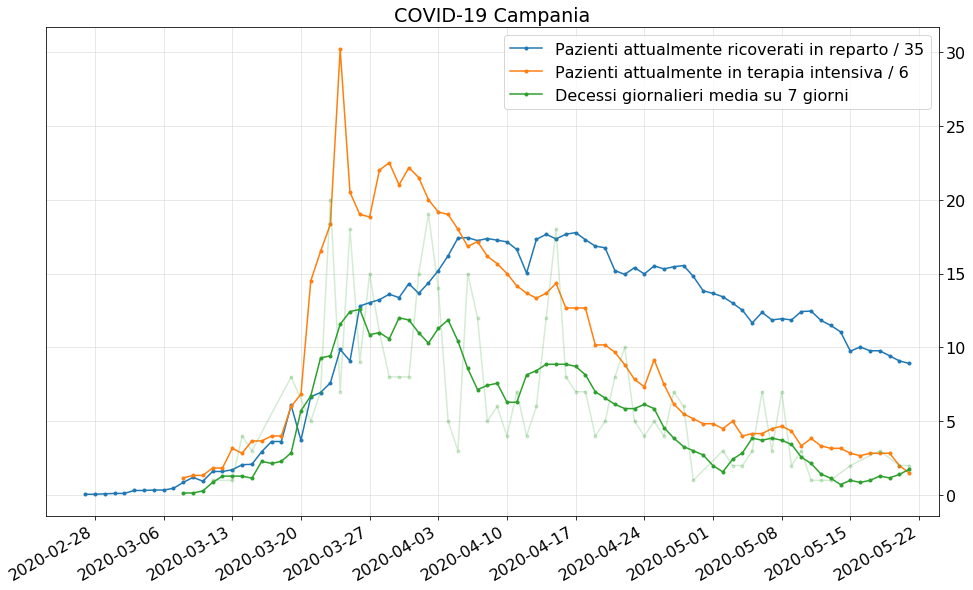

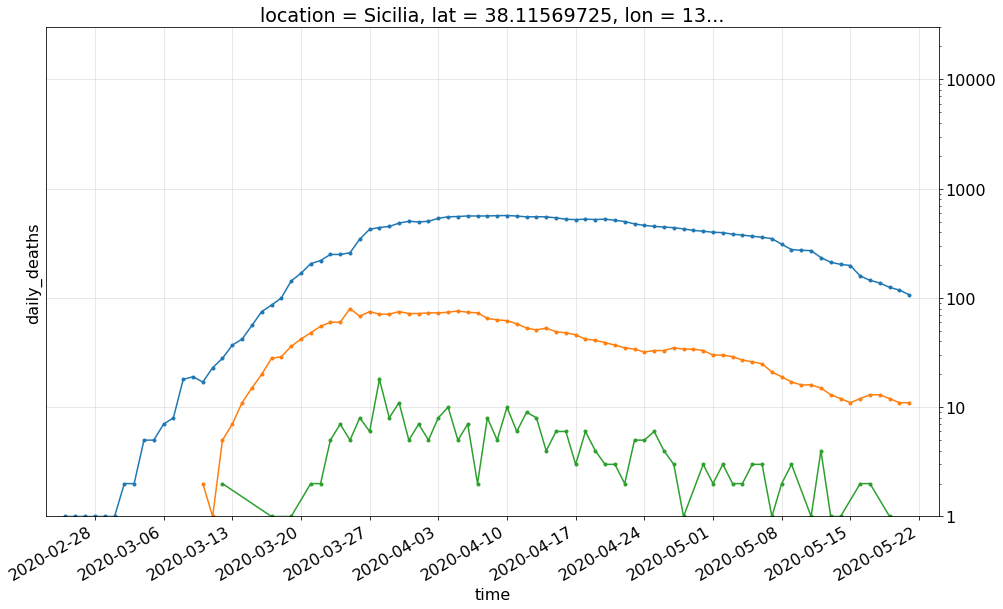

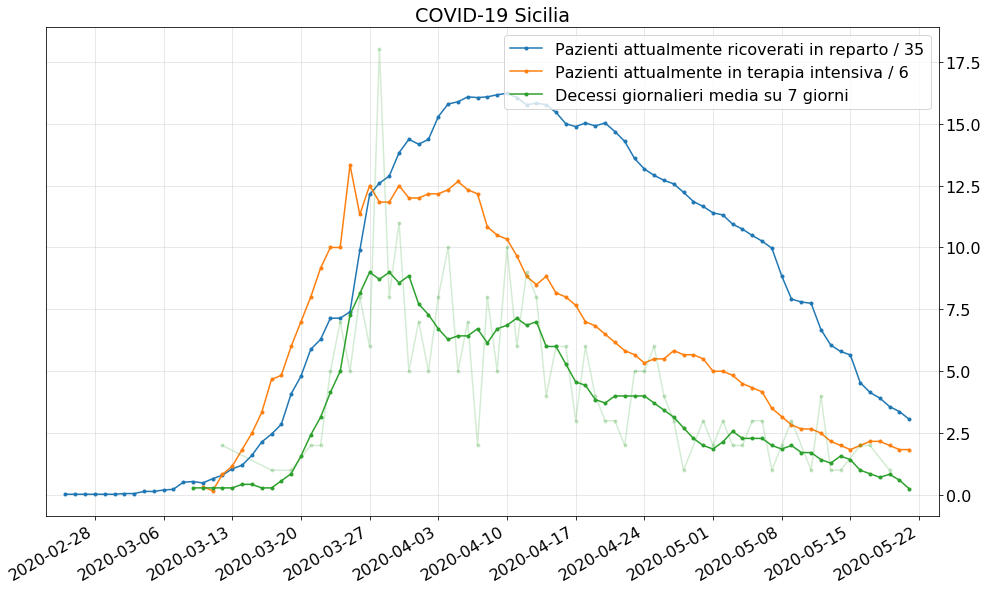

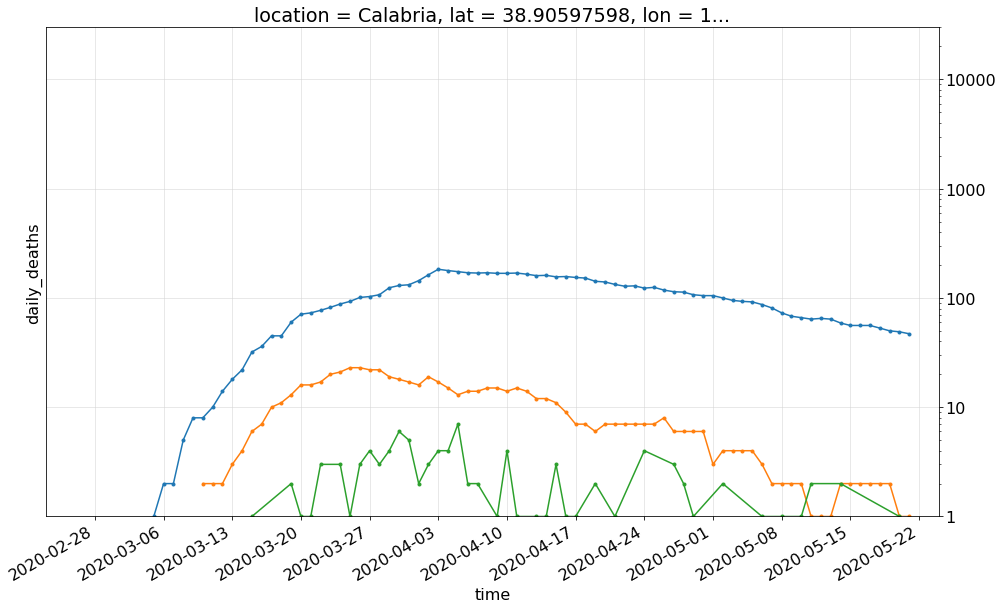

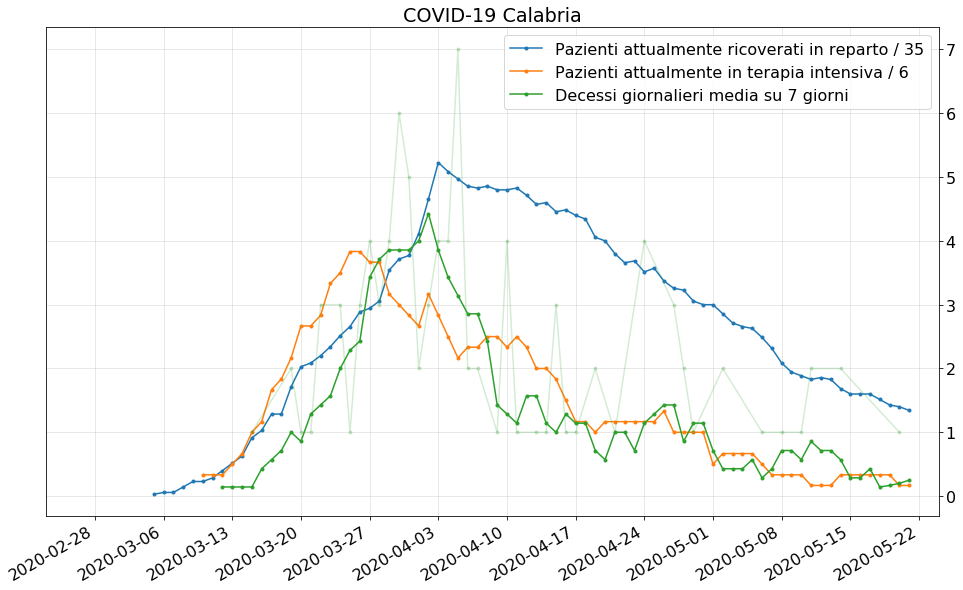

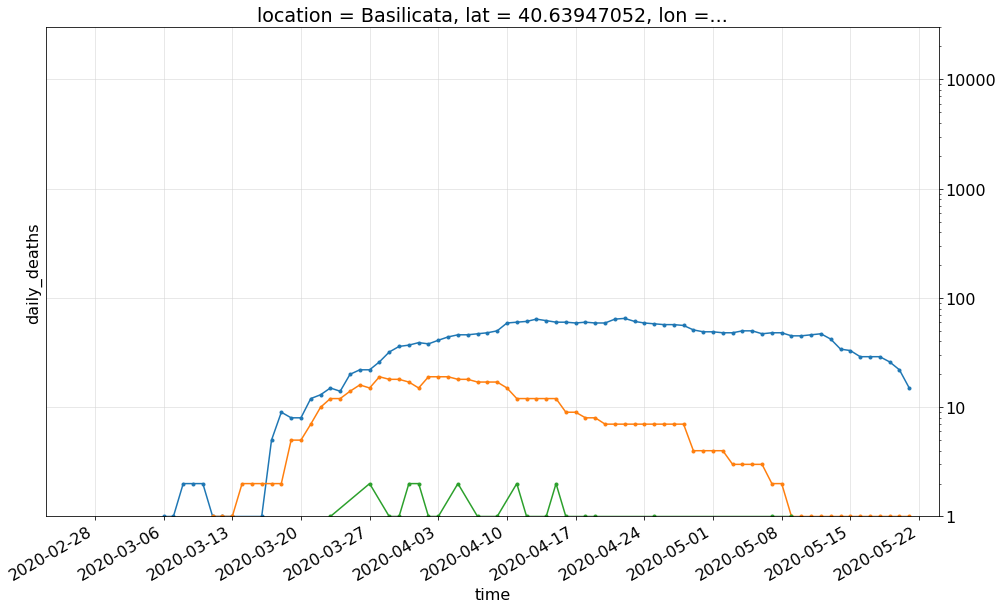

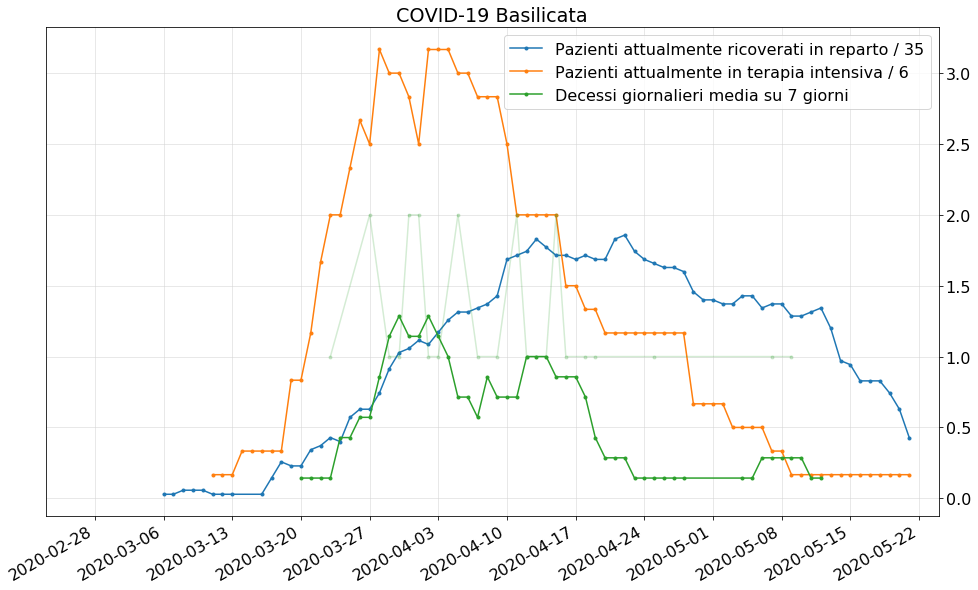

In [21]:
for region in REGIONS:
    fit_kinds = region_fits[region]
    ds_region = ds_italy_regions.sel(location=region)
    
    _, ax = plt.subplots(1, subplot_kw={'xlim': XLIM})
    ax.set(yscale='log', ylim=(1, 30000)) 
    ax.set_title(f'COVID-19 {region}')
    ax.yaxis.tick_right()
    ax.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax.xaxis.grid(color='lightgrey', linewidth=0.5)

    for (kind, fitsk), color in zip(fit_kinds.items(), PALETTE_ONE):
        label = LABEL[kind]
        covid19.plot.plot_data(ax, ds_region[kind], label=label, color=color)
        #for fit in fitsk:
        #    covid19.plot.plot(ax, ds_region[kind], fit, color=color, date_interval=7, add_diff=False)

    _, ax = plt.subplots(1, subplot_kw={'xlim': XLIM})
    ax.yaxis.tick_right()
    ax.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax.xaxis.grid(color='lightgrey', linewidth=0.5)

#    covid19.plot.plot_data(ax, data[region]['variazione_deaths_4'], label=label, color=color, alpha=0.5)
    for (kind, fitsk), color in zip(fit_kinds.items(), PALETTE_ONE):
        ratio = RATIO[kind]
        label = LABEL[kind] + ('' if ratio == 1 else f' / {ratio}')
        if kind == 'daily_deaths':
            covid19.plot.plot_data(ax, ds_region[kind] / RATIO[kind], color=color, alpha=0.2)
            covid19.plot.plot_data(ax, ds_region[kind].rolling({'time': 7}, center=True, min_periods=1).mean() / RATIO[kind], label=label + ' media su 7 giorni', color=color)
        else:
            covid19.plot.plot_data(ax, ds_region[kind] / RATIO[kind], label=label, color=color)
    ax.set_title(f'COVID-19 {region}')
    ax.set(xlabel="", ylabel="")
    ax.legend()


In [22]:
rr = r.sel(time=slice('2020-03-15', None))

cop = rr['cases'].diff('time') / rr['current_cases'] * 100

ax = covid19.plot.plot_xarray(cop.rolling({'time': 6}, center=True).mean(), hue='location')
ax.set(ylim=(0, 5))
_ = ax.legend()

AttributeError: 'list' object has no attribute 'sel'

In [ ]:
ax = covid19.plot.scatter_xarray(rr['cases'].diff('time') / rr['current_cases'] * 100, rr['tests'].diff('time') / rr['current_cases'], window=7)
_ = ax.set(xlim=(0, 5))

In [ ]:
rr = r.sel(location=['Italy / Lombardia', 'Italy / P.A. Trento', 'Italy / Marche', 'Italy / Piemonte', 'Italy / Emilia-Romagna', 'Italy / Liguria', 'Italy / P.A. Bolzano', 'Italy / Lazio'], time=slice('2020-04-01', None))
ax = covid19.plot.scatter_xarray(rr['cases'].diff('time') / rr['current_cases'] * 100, (rr['current_severe'] + rr['current_critical']) / rr['current_cases'] * 100, window=7)
_ = ax.set(xlim=(0, None), ylim=(0, None))

In [ ]:
rr = r.sel(location=['Italy / Lombardia', 'Italy / P.A. Trento', 'Italy / Marche', 'Italy / Piemonte', 'Italy / Emilia-Romagna', 'Italy / Liguria', 'Italy / Veneto', 'Italy / Lazio', 'Italy / Umbria'], time=slice('2020-04-01', None))
ax = covid19.plot.scatter_xarray(rr['current_severe'] / rr['current_cases'] * 100, rr['cases'].diff('time') / rr['tested'].diff('time') * 100, window=7)
_ = ax.set(xlim=(5, 40), ylim=(0, 20))
